In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import History
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.svm import SVC
import skfuzzy as fuzz

In [2]:
# Cung cấp đường dẫn đầy đủ đến thư mục chứa file của bộ huấn luyện
data_path = r"D:\baomathethong\archive\01-12"

In [3]:
# File cần đọc
file_to_read = "DrDoS_DNS.csv"

In [4]:
# Đường dẫn đầy đủ đến file
full_path = os.path.join(data_path, file_to_read)

In [5]:
# Đọc file CSV vào DataFrame
df = pd.read_csv(full_path, nrows=1000)
df1=pd.read_csv(full_path,  nrows=50000)

C:\Users\ACER\AppData\Local\Temp\ipykernel_16032\2813644772.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(full_path,  nrows=50000)


In [6]:
df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2399,172.16.0.5-192.168.50.1-634-32698-17,172.16.0.5,634,192.168.50.1,32698,17,2018-12-01 10:52:38.896755,138696,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
996,1315,172.16.0.5-192.168.50.1-32698-634-17,192.168.50.1,634,172.16.0.5,32698,17,2018-12-01 10:52:38.896884,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
997,1153,172.16.0.5-192.168.50.1-634-58670-17,172.16.0.5,634,192.168.50.1,58670,17,2018-12-01 10:52:39.035865,30765,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
998,496,172.16.0.5-192.168.50.1-634-62860-17,172.16.0.5,634,192.168.50.1,62860,17,2018-12-01 10:52:39.066991,31150,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [7]:
df1

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16103,172.16.0.5-192.168.50.1-564-20039-17,172.16.0.5,564,192.168.50.1,20039,17,2018-12-01 11:06:08.709160,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
49996,2575,172.16.0.5-192.168.50.1-564-51953-17,172.16.0.5,564,192.168.50.1,51953,17,2018-12-01 11:06:08.709211,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
49997,21953,172.16.0.5-192.168.50.1-642-36921-17,172.16.0.5,642,192.168.50.1,36921,17,2018-12-01 11:06:08.709264,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
49998,4343,172.16.0.5-192.168.50.1-564-65535-17,172.16.0.5,564,192.168.50.1,65535,17,2018-12-01 11:06:08.709313,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


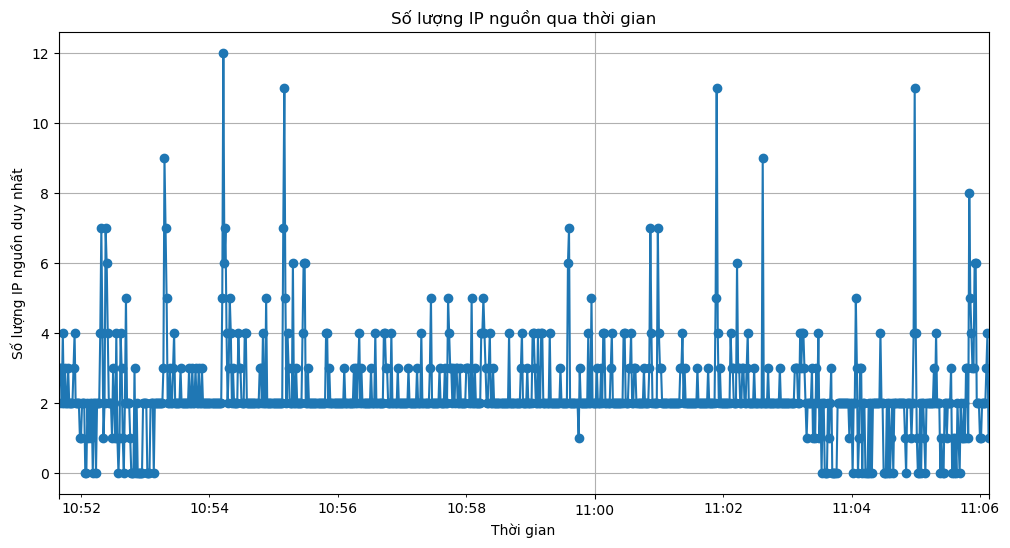

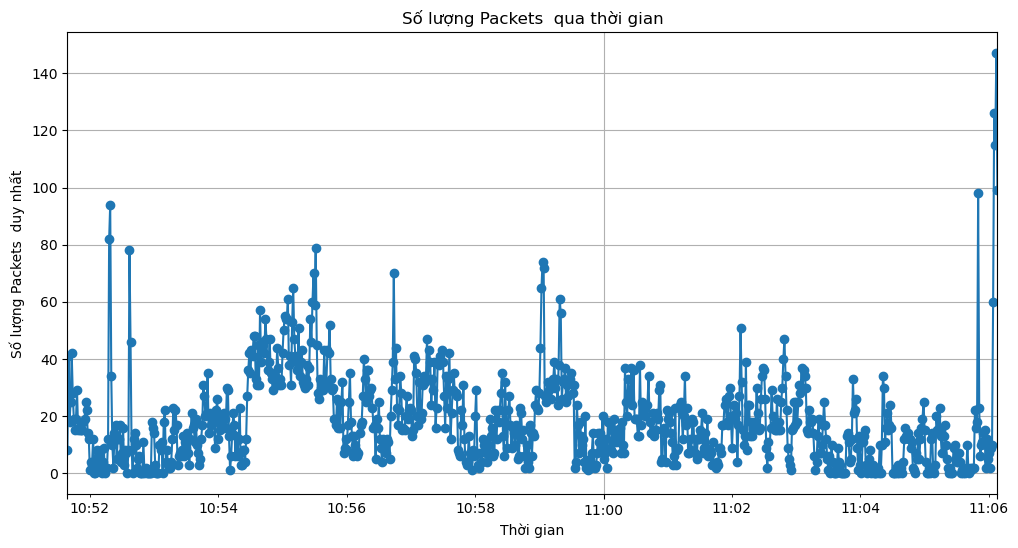

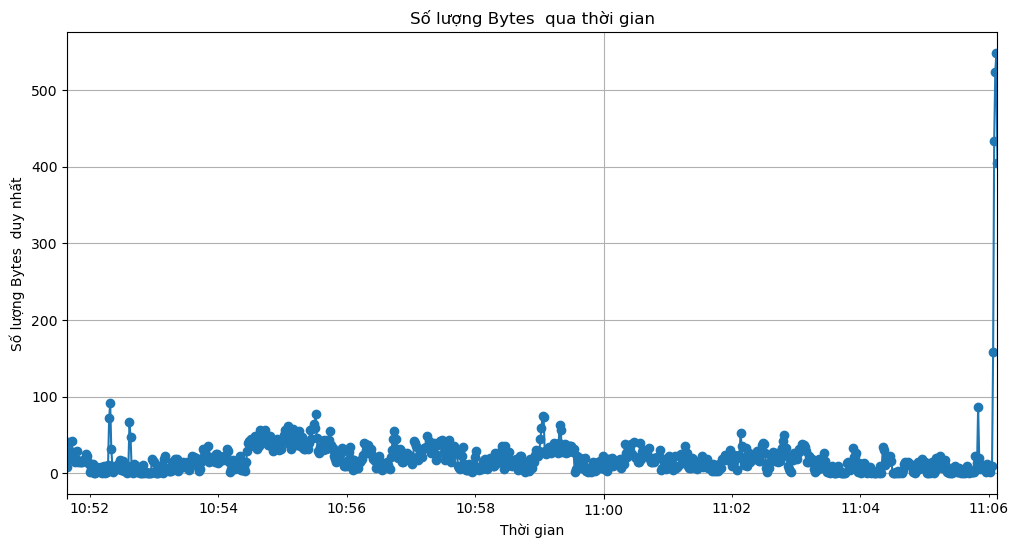

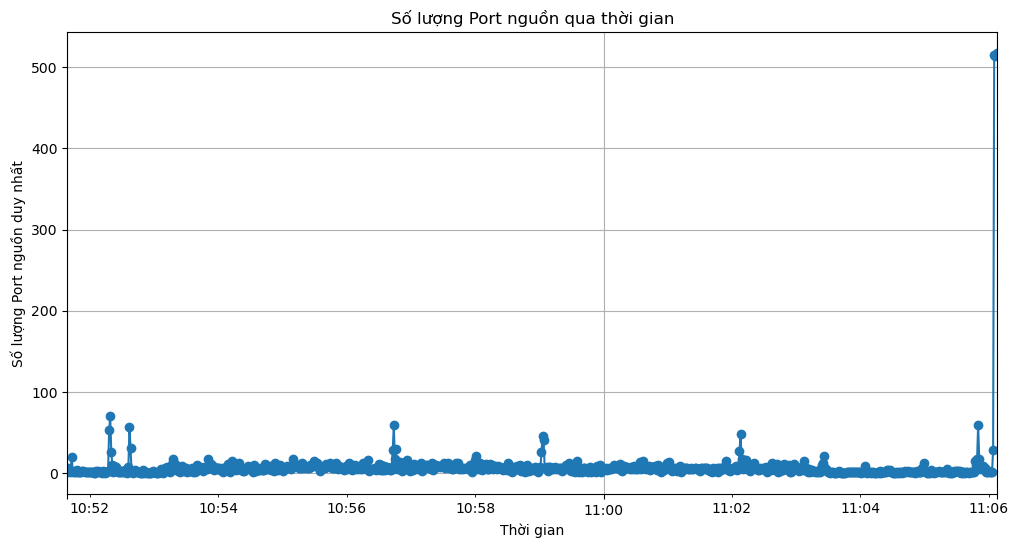

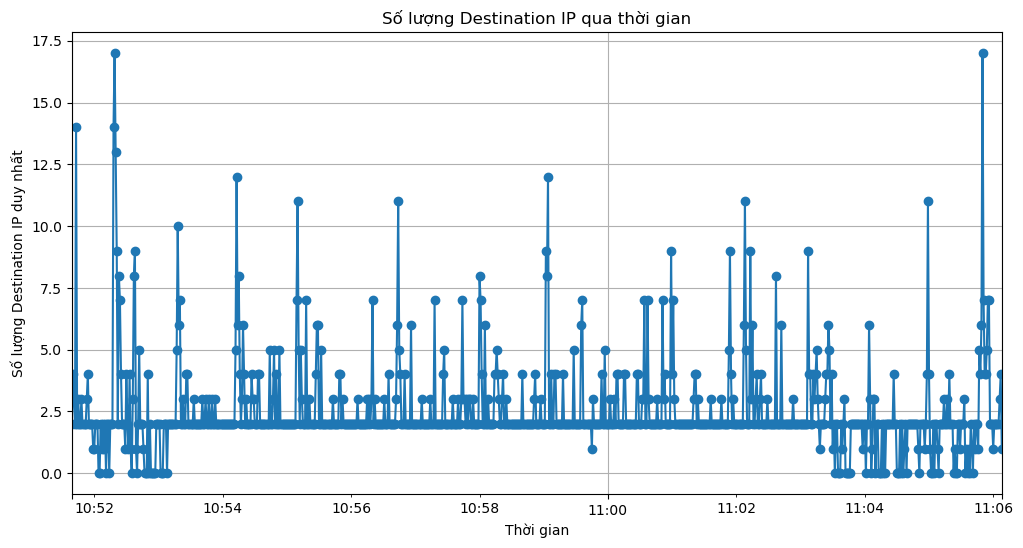

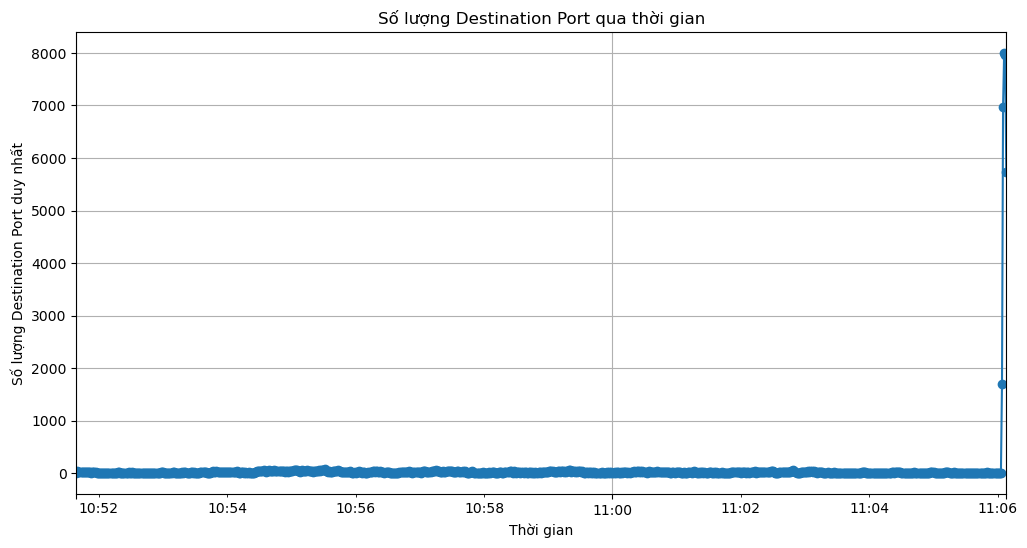

<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Chuyển đổi cột 'Timestamp' sang định dạng datetime
df1[' Timestamp'] = pd.to_datetime(df1[' Timestamp'])

# Tạo nhóm dựa trên timestamp với tần suất là mỗi giây
df_grouped_1 = df1.groupby(pd.Grouper(key=' Timestamp', freq='1S'))

# Tính toán số lượng IP nguồn duy nhất trong mỗi nhóm
df_summary_1 = df_grouped_1[' Source IP'].nunique()
df_summary_2 = df_grouped_1[' Flow Packets/s'].nunique()
df_summary_3 = df_grouped_1['Flow Bytes/s'].nunique()
df_summary_4 = df_grouped_1[' Source Port'].nunique()
df_summary_5 = df_grouped_1[' Destination IP'].nunique()
df_summary_6 = df_grouped_1[' Destination Port'].nunique()


# Vẽ biểu đồ
df_summary_1.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Số lượng IP nguồn qua thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng IP nguồn duy nhất')
plt.grid(True)
plt.show()
# Vẽ biểu đồ
df_summary_2.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Số lượng Packets  qua thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng Packets  duy nhất')
plt.grid(True)
plt.show()

# Vẽ biểu đồ
df_summary_3.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Số lượng Bytes  qua thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng Bytes  duy nhất')
plt.grid(True)
plt.show()

# Vẽ biểu đồ
df_summary_4.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Số lượng Port nguồn qua thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng Port nguồn duy nhất')
plt.grid(True)
plt.show()

# Vẽ biểu đồ
df_summary_5.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Số lượng Destination IP qua thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng Destination IP duy nhất')
plt.grid(True)
plt.show()
# Vẽ biểu đồ
df_summary_6.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Số lượng Destination Port qua thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng Destination Port duy nhất')
plt.grid(True)
plt.show()

# Đảm bảo các đồ thị không chồng lên nhau
plt.tight_layout()
plt.show()


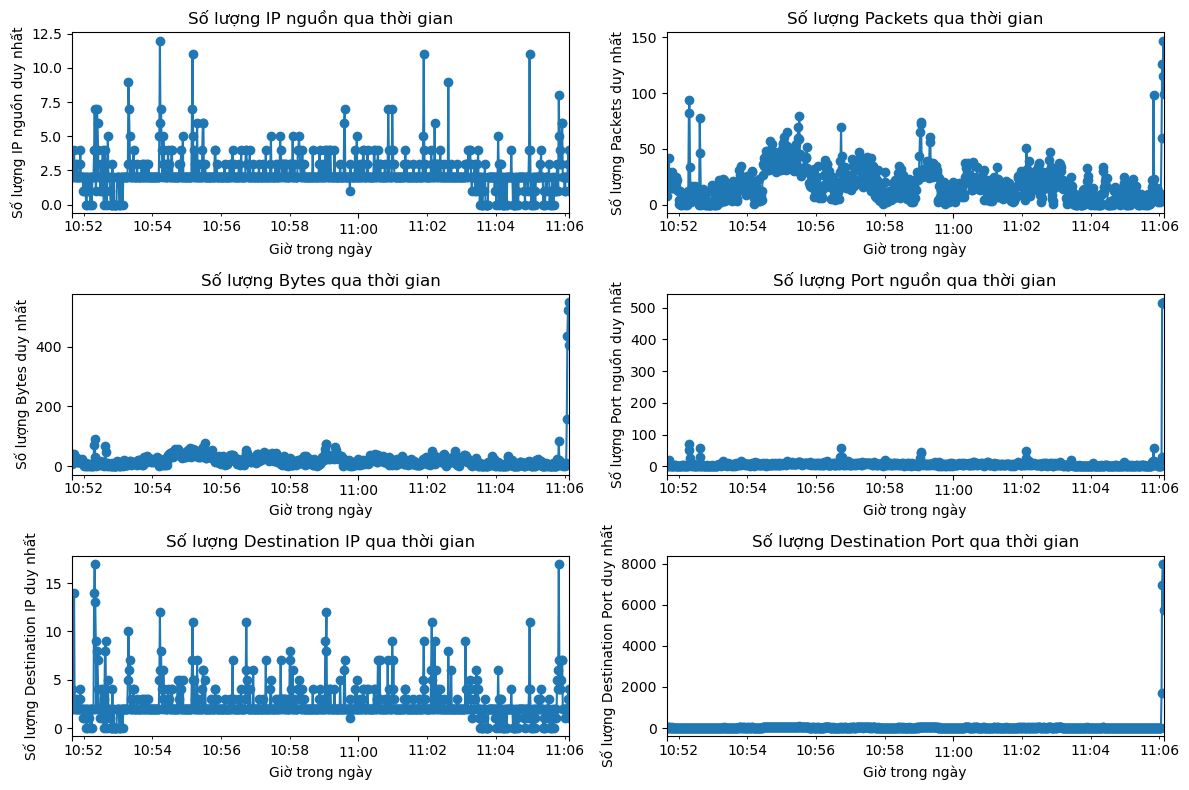

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột 'Timestamp' sang định dạng datetime
df1[' Timestamp'] = pd.to_datetime(df1[' Timestamp'])

# Tạo nhóm dựa trên timestamp với tần suất là mỗi giờ
df_grouped_1 = df1.groupby(pd.Grouper(key=' Timestamp', freq='1S'))

# Tính toán số lượng duy nhất cho mỗi loại dữ liệu trong mỗi giờ
df_summary_1 = df_grouped_1[' Source IP'].nunique()
df_summary_2 = df_grouped_1[' Flow Packets/s'].nunique()
df_summary_3 = df_grouped_1['Flow Bytes/s'].nunique()
df_summary_4 = df_grouped_1[' Source Port'].nunique()
df_summary_5 = df_grouped_1[' Destination IP'].nunique()
df_summary_6 = df_grouped_1[' Destination Port'].nunique()

# Vẽ từng biểu đồ riêng lẻ
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
df_summary_1.plot(kind='line', marker='o')
plt.title('Số lượng IP nguồn qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng IP nguồn duy nhất')

plt.subplot(3, 2, 2)
df_summary_2.plot(kind='line', marker='o')
plt.title('Số lượng Packets qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Packets duy nhất')

plt.subplot(3, 2, 3)
df_summary_3.plot(kind='line', marker='o')
plt.title('Số lượng Bytes qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Bytes duy nhất')

plt.subplot(3, 2, 4)
df_summary_4.plot(kind='line', marker='o')
plt.title('Số lượng Port nguồn qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Port nguồn duy nhất')

plt.subplot(3, 2, 5)
df_summary_5.plot(kind='line', marker='o')
plt.title('Số lượng Destination IP qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Destination IP duy nhất')

plt.subplot(3, 2, 6)
df_summary_6.plot(kind='line', marker='o')
plt.title('Số lượng Destination Port qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Destination Port duy nhất')

# Đảm bảo các đồ thị không chồng lên nhau
plt.tight_layout()
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_16032\4046272643.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax5 = plt.subplot(2, 3, 3)
C:\Users\ACER\AppData\Local\Temp\ipykernel_16032\4046272643.py:63: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


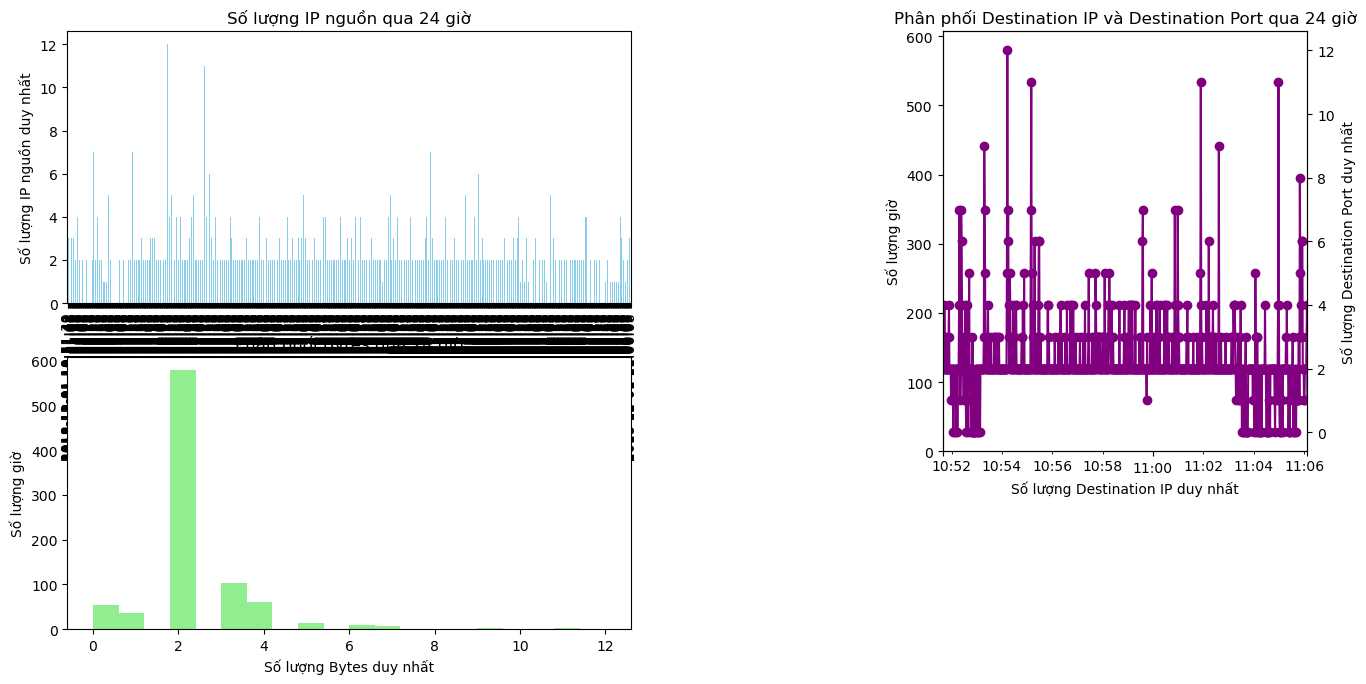

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột 'Timestamp' sang định dạng datetime
df1[' Timestamp'] = pd.to_datetime(df1[' Timestamp'])

# Tạo nhóm dựa trên timestamp với tần suất là mỗi giờ
df_grouped_1 = df1.groupby(pd.Grouper(key=' Timestamp', freq='1S'))

# Tính toán số lượng duy nhất cho mỗi loại dữ liệu trong mỗi giờ
df_summary_1 = df_grouped_1[' Source IP'].nunique()
df_summary_2 = df_grouped_1[' Flow Packets/s'].nunique()
df_summary_3 = df_grouped_1['Flow Bytes/s'].nunique()
df_summary_4 = df_grouped_1[' Source Port'].nunique()
df_summary_5 = df_grouped_1[' Destination IP'].nunique()
df_summary_6 = df_grouped_1[' Destination Port'].nunique()

# Vẽ các biểu đồ
plt.figure(figsize=(16, 12))

# Biểu đồ cột
plt.subplot(3, 2, 1)
df_summary_1.plot(kind='bar', color='skyblue')
plt.title('Số lượng IP nguồn qua 24 giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng IP nguồn duy nhất')

# Biểu đồ đường
plt.subplot(3, 2, 2)
df_summary_1.plot(kind='line', marker='o', color='orange')
plt.title('Số lượng Packets qua 24 giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Packets duy nhất')

# Biểu đồ phân phối
plt.subplot(3, 2, 3)
plt.hist(df_summary_1, bins=20, color='lightgreen')
plt.title('Phân phối Bytes qua 24 giờ')
plt.xlabel('Số lượng Bytes duy nhất')
plt.ylabel('Số lượng giờ')

# Biểu đồ kết hợp
plt.subplot(3, 2, 4)
df_summary_1.plot(kind='line', marker='o', color='red')
df_summary_1.plot(kind='line', marker='o', color='blue')
plt.title('Số lượng Port và Destination IP qua 24 giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng duy nhất')
plt.legend(['Port nguồn', 'Destination IP'])


# Biểu đồ phân phối và kết hợp cột và đường
ax5 = plt.subplot(2, 3, 3)
ax5.hist(df_summary_1, bins=20, color='lightblue')
ax6 = ax5.twinx()
df_summary_1.plot(kind='line', ax=ax6, marker='o', color='purple')
ax5.set_title('Phân phối Destination IP và Destination Port qua 24 giờ')
ax5.set_xlabel('Số lượng Destination IP duy nhất')
ax5.set_ylabel('Số lượng giờ')
ax6.set_ylabel('Số lượng Destination Port duy nhất')

# Đảm bảo các đồ thị không chồng lên nhau
plt.tight_layout()
plt.show()


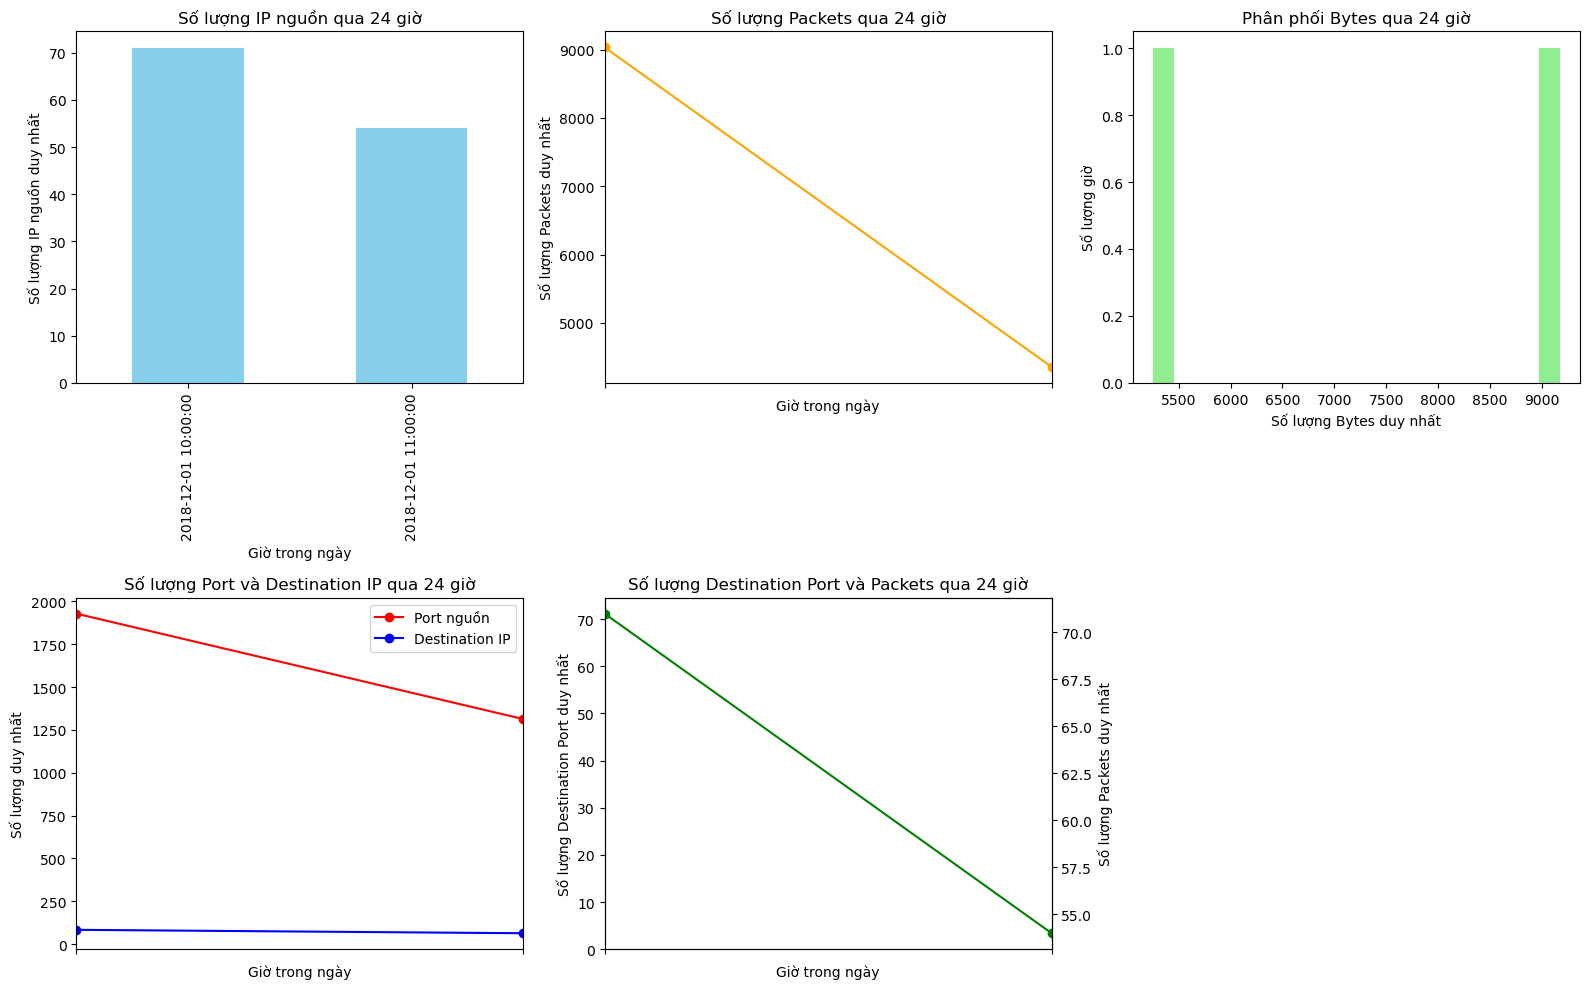

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột 'Timestamp' sang định dạng datetime
df1[' Timestamp'] = pd.to_datetime(df1[' Timestamp'])

# Tạo nhóm dựa trên timestamp với tần suất là mỗi giờ
df_grouped_1 = df1.groupby(pd.Grouper(key=' Timestamp', freq='1H'))

# Tính toán số lượng duy nhất cho mỗi loại dữ liệu trong mỗi giờ
df_summary_1 = df_grouped_1[' Source IP'].nunique()
df_summary_2 = df_grouped_1[' Flow Packets/s'].nunique()
df_summary_3 = df_grouped_1['Flow Bytes/s'].nunique()
df_summary_4 = df_grouped_1[' Source Port'].nunique()
df_summary_5 = df_grouped_1[' Destination IP'].nunique()
df_summary_6 = df_grouped_1[' Destination Port'].nunique()

# Vẽ biểu đồ kết hợp
plt.figure(figsize=(16, 10))

# Biểu đồ cột
ax1 = plt.subplot(2, 3, 1)
df_summary_1.plot(kind='bar', ax=ax1, color='skyblue')
plt.title('Số lượng IP nguồn qua 24 giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng IP nguồn duy nhất')

# Biểu đồ đường
ax2 = plt.subplot(2, 3, 2)
df_summary_2.plot(kind='line', ax=ax2, marker='o', color='orange')
plt.title('Số lượng Packets qua 24 giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Packets duy nhất')

# Biểu đồ phân phối
ax3 = plt.subplot(2, 3, 3)
ax3.hist(df_summary_3, bins=20, color='lightgreen')
plt.title('Phân phối Bytes qua 24 giờ')
plt.xlabel('Số lượng Bytes duy nhất')
plt.ylabel('Số lượng giờ')

# Biểu đồ kết hợp
ax4 = plt.subplot(2, 3, 4)
df_summary_4.plot(kind='line', ax=ax4, marker='o', color='red')
df_summary_5.plot(kind='line', ax=ax4, marker='o', color='blue')
plt.title('Số lượng Port và Destination IP qua 24 giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng duy nhất')
plt.legend(['Port nguồn', 'Destination IP'])

# Biểu đồ cột kết hợp với biểu đồ đường
ax5 = plt.subplot(2, 3, 5)
df_summary_1.plot(kind='bar', ax=ax5, color='purple')
ax6 = ax5.twinx()
df_summary_1.plot(kind='line', ax=ax6, marker='o', color='green')
plt.title('Số lượng Destination Port và Packets qua 24 giờ')
ax5.set_xlabel('Giờ trong ngày')
ax5.set_ylabel('Số lượng Destination Port duy nhất')
ax6.set_ylabel('Số lượng Packets duy nhất')

# Đảm bảo các đồ thị không chồng lên nhau
plt.tight_layout()
plt.show()


In [12]:
num_unique_ips = df1[' Source IP'].nunique()

print("Số lượng giá trị duy nhất trong cột 'Source IP':", num_unique_ips)

Số lượng giá trị duy nhất trong cột 'Source IP': 100


In [13]:
# Giả sử df là DataFrame chứa dữ liệu luồng

# Xác định ngưỡng để xem giá trị là bất thường
threshold = 5  # Ngưỡng

# Đếm số lần xuất hiện của mỗi giá trị trong cột 'Source IP'
ip_counts = df1[' Source IP'].value_counts()
ip_counts

# Lọc các giá trị có số lần xuất hiện thấp hơn ngưỡng
anomalies = ip_counts[ip_counts < threshold]

# Hiển thị các giá trị không phổ biến
print("Các giá trị không phổ biến trong cột 'Source IP':")
print(ip_counts)


Các giá trị không phổ biến trong cột 'Source IP':
 Source IP
172.16.0.5         47300
192.168.50.1        1005
192.168.50.6         649
192.168.50.8         411
192.168.50.7         288
                   ...  
108.177.112.108        1
172.217.6.194          1
34.193.24.97           1
23.194.141.240         1
172.217.0.106          1
Name: count, Length: 100, dtype: int64


In [14]:
df['label_so'] = 0

In [17]:
# Đếm số lượng các giá trị 'DrDoS_DNS' và 'normal' sau khi gán giá trị 1 cho 'DrDoS_DNS'
count_label_so = df['label_so'].value_counts()

# In số lượng của mỗi nhãn sau khi gán giá trị 1 cho 'DrDoS_DNS'
print("DDoS:", count_label_so.get(1, 0))  # In số lượng dòng có nhãn 'DrDoS_DNS'
print("Normal:", count_label_so.get(0, 0))  # In số lượng dòng có nhãn 'Normal'


DDoS: 634
Normal: 366


In [15]:
# Đặt giá trị 1 cho các dòng có giá trị 'DrDoS_DNS' trong cột 'column_name'
df.loc[df[' Label'] == 'DrDoS_DNS', 'label_so'] = 1

In [9]:
print("Unique values in label_so:", df['label_so'].unique())

Unique values in label_so: [1 0]


In [10]:
print(df.columns)

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [11]:
df.isna().sum()

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
 Idle Min          0
SimillarHTTP       0
 Inbound           0
 Label             0
label_so           0
Length: 89, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 89 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1000 non-null   int64  
 1   Flow ID                       1000 non-null   object 
 2    Source IP                    1000 non-null   object 
 3    Source Port                  1000 non-null   int64  
 4    Destination IP               1000 non-null   object 
 5    Destination Port             1000 non-null   int64  
 6    Protocol                     1000 non-null   int64  
 7    Timestamp                    1000 non-null   object 
 8    Flow Duration                1000 non-null   int64  
 9    Total Fwd Packets            1000 non-null   int64  
 10   Total Backward Packets       1000 non-null   int64  
 11  Total Length of Fwd Packets   1000 non-null   float64
 12   Total Length of Bwd Packets  1000 non-null   float64
 13   Fwd

In [14]:
print(df.columns)


Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 89 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1000 non-null   int64  
 1   Flow ID                       1000 non-null   object 
 2    Source IP                    1000 non-null   object 
 3    Source Port                  1000 non-null   int64  
 4    Destination IP               1000 non-null   object 
 5    Destination Port             1000 non-null   int64  
 6    Protocol                     1000 non-null   int64  
 7    Timestamp                    1000 non-null   object 
 8    Flow Duration                1000 non-null   int64  
 9    Total Fwd Packets            1000 non-null   int64  
 10   Total Backward Packets       1000 non-null   int64  
 11  Total Length of Fwd Packets   1000 non-null   float64
 12   Total Length of Bwd Packets  1000 non-null   float64
 13   Fwd

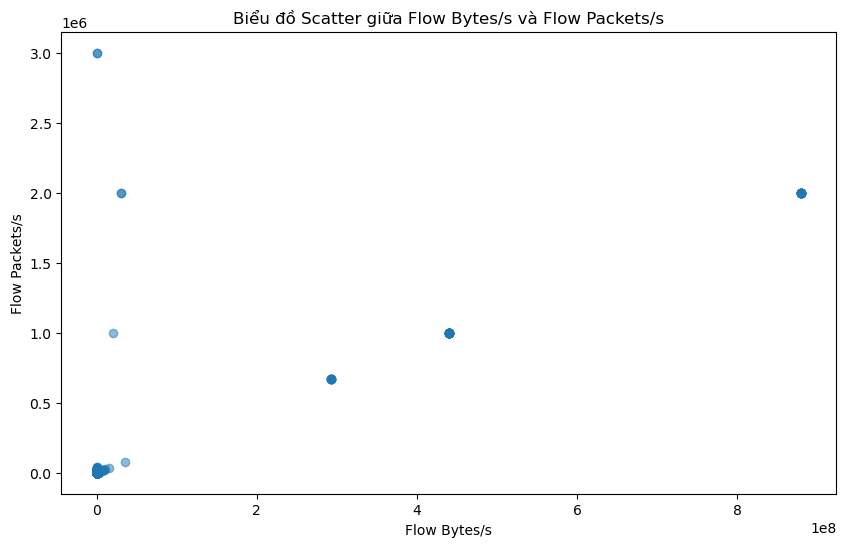

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Flow Bytes/s'], df[' Flow Packets/s'], alpha=0.5)
plt.xlabel('Flow Bytes/s')
plt.ylabel('Flow Packets/s')
plt.title('Biểu đồ Scatter giữa Flow Bytes/s và Flow Packets/s')
plt.show()

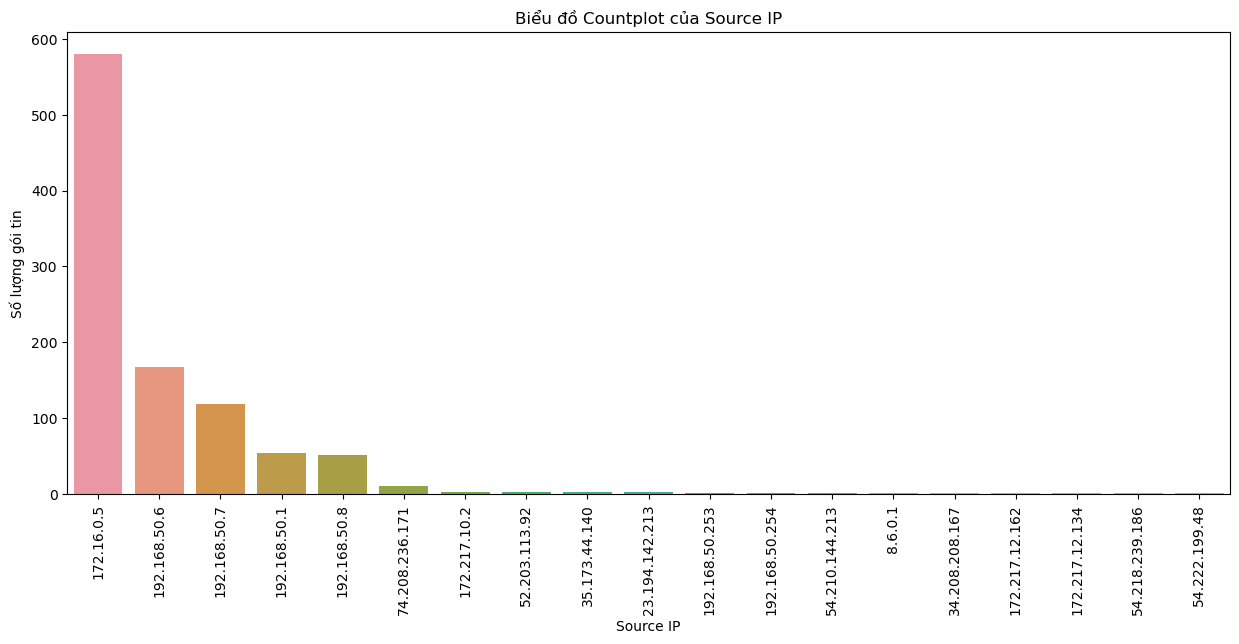

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(x=' Source IP', data=df, order=df[' Source IP'].value_counts().index)
plt.xlabel('Source IP')
plt.ylabel('Số lượng gói tin')
plt.title('Biểu đồ Countplot của Source IP')
plt.xticks(rotation=90)
plt.show()

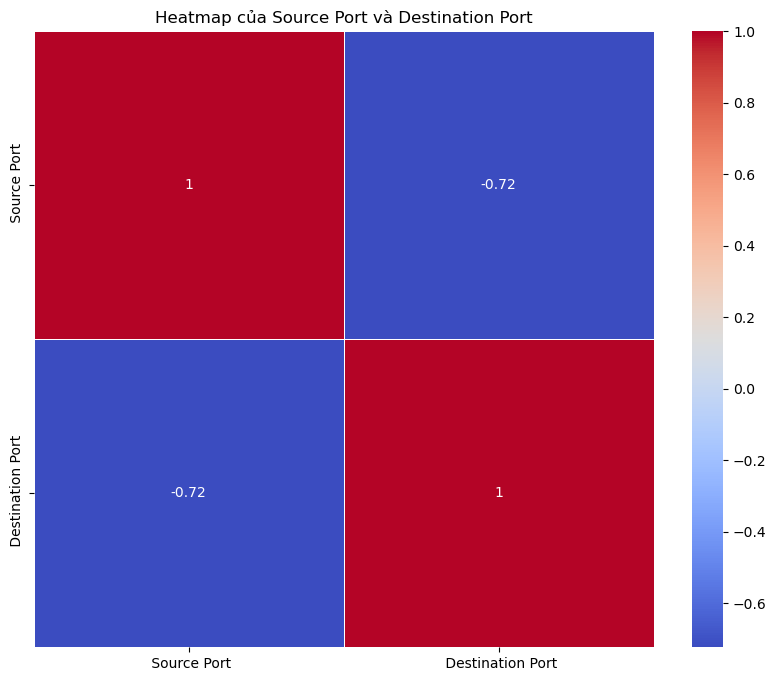

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[[' Source Port', ' Destination Port']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap của Source Port và Destination Port')
plt.show()

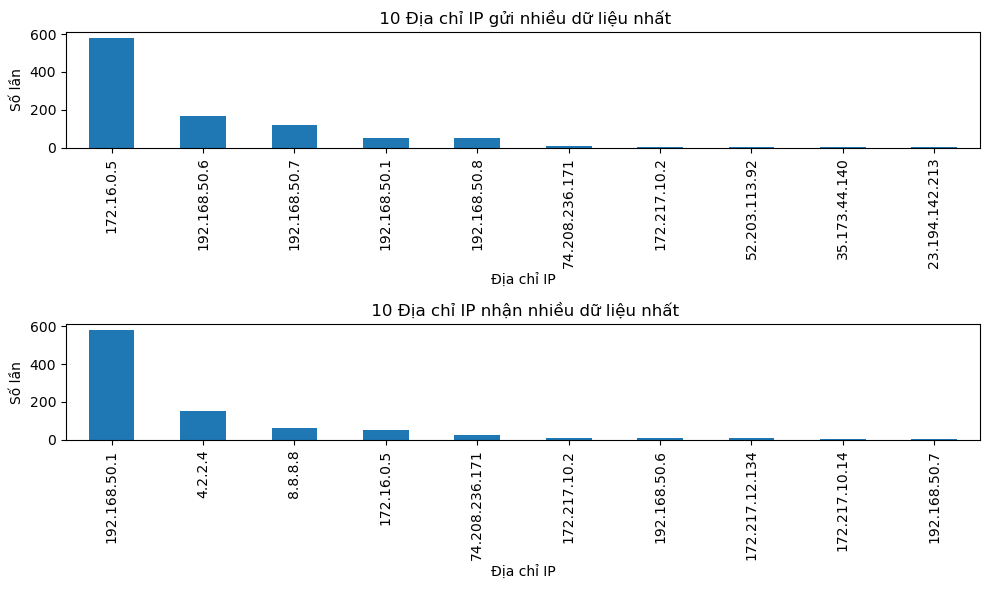

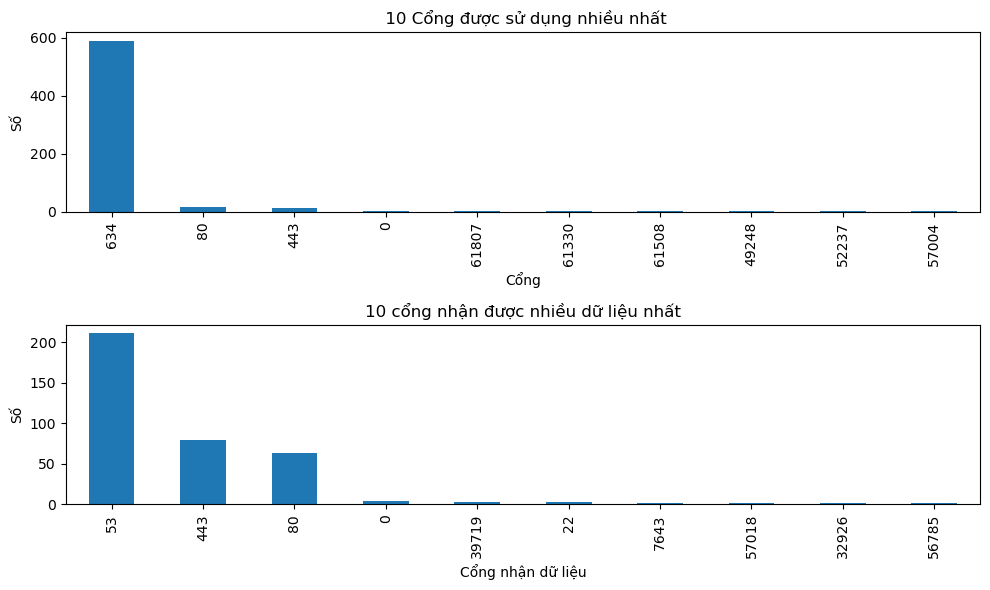

In [20]:
# Phân tích theo địa chỉ IP
plt.figure(figsize=(10, 6))

# Địa chỉ IP gửi nhiều dữ liệu nhất
plt.subplot(2, 1, 1)
source_ip_addresses = df[" Source IP"].value_counts().head(10)
source_ip_addresses.plot(kind='bar')
plt.title(' 10 Địa chỉ IP gửi nhiều dữ liệu nhất')
plt.xlabel('Địa chỉ IP')
plt.ylabel('Số lần')

# Địa chỉ IP nhận nhiều dữ liệu nhất
plt.subplot(2, 1, 2)
destination_ip_addresses = df[" Destination IP"].value_counts().head(10)
destination_ip_addresses.plot(kind='bar')
plt.title(' 10 Địa chỉ IP nhận nhiều dữ liệu nhất')
plt.xlabel('Địa chỉ IP')
plt.ylabel('Số lần')

plt.tight_layout()
plt.show()

# Phân tích theo cổng
plt.figure(figsize=(10, 6))

# Cổng được sử dụng nhiều nhất
plt.subplot(2, 1, 1)
source_ports = df[" Source Port"].value_counts().head(10)
source_ports.plot(kind='bar')
plt.title(' 10 Cổng được sử dụng nhiều nhất')
plt.xlabel('Cổng')
plt.ylabel('Số')

# Cổng nhận nhiều dữ liệu nhất
plt.subplot(2, 1, 2)
destination_ports = df[" Destination Port"].value_counts().head(10)
destination_ports.plot(kind='bar')
plt.title('10 cổng nhận được nhiều dữ liệu nhất')
plt.xlabel('Cổng nhận dữ liệu')
plt.ylabel('Số')

plt.tight_layout()
plt.show()

In [21]:
df = df.dropna()

In [22]:
# Chọn chỉ các cột có kiểu dữ liệu số
numeric_columns = df.select_dtypes(include=np.number)

# Kiểm tra giá trị min và max của dữ liệu số
print("Giá trị min:", np.min(numeric_columns))
print("Giá trị max:", np.max(numeric_columns))

Giá trị min: -212543795000.0
Giá trị max: inf


In [23]:
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [24]:
# Chọn chỉ các cột có kiểu dữ liệu số
numeric_columns = df.select_dtypes(include=np.number)

# Kiểm tra giá trị min và max của dữ liệu số
print("Giá trị min:", np.min(numeric_columns))
print("Giá trị max:", np.max(numeric_columns))

Giá trị min: -212543795000.0
Giá trị max: 880000000.0


In [25]:
#Kết quả cho thấy số lượng duy nhất của 'Source IP' trong mỗi nhóm thời gian 1 giây.
#Ví dụ, vào thời điểm '2018-12-01 10:51:39', có 2 địa chỉ IP nguồn khác nhau.
# Trích xuất timestamp
df[' Timestamp'] = pd.to_datetime(df[' Timestamp'])

# Tạo nhóm dựa trên timestamp
df_grouped = df.groupby(pd.Grouper(key=' Timestamp', freq='1S'))

# Tóm tắt các luồng trong mỗi nhóm
df_summary = df_grouped[' Source IP'].nunique()

# In ra kết quả
print(df_summary.head())

 Timestamp
2018-12-01 10:51:39    2
2018-12-01 10:51:40    3
2018-12-01 10:51:41    3
2018-12-01 10:51:42    2
2018-12-01 10:51:43    4
Freq: S, Name:  Source IP, dtype: int64


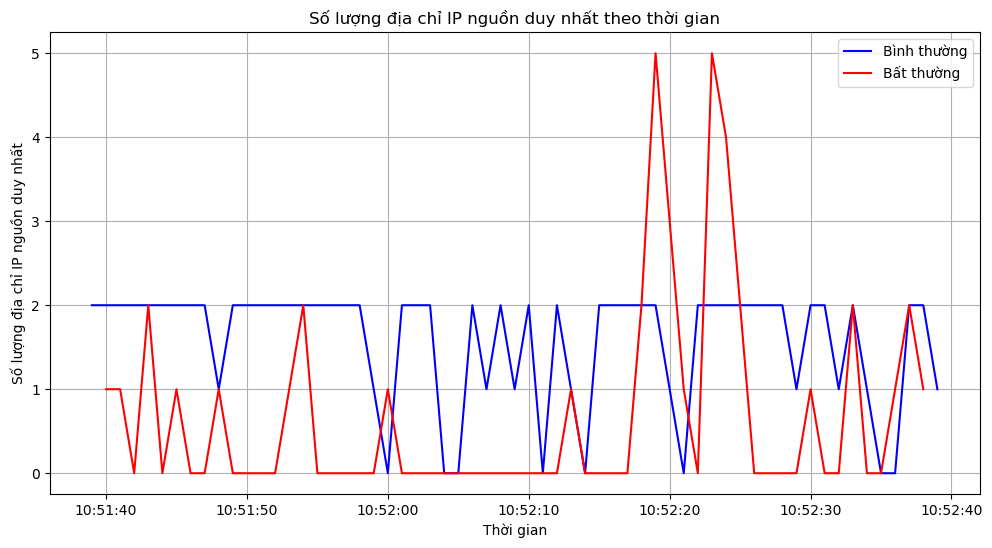

In [26]:
# Tách thành hai nhóm: bình thường (normal) và bất thường (anomaly)
df_normal = df[df[' Label'] == 'DrDoS_DNS']
df_anomalies = df[df[' Label'] == 'BENIGN']

# Nhóm theo khoảng thời gian 1 giây cho cả hai nhóm
normal_grouped = df_normal.groupby(pd.Grouper(key=' Timestamp', freq='1S'))
anomalies_grouped = df_anomalies.groupby(pd.Grouper(key=' Timestamp', freq='1S'))

# Áp dụng xử lý cho mỗi nhóm nếu cần thiết
# Ví dụ: Tính tổng số lượng địa chỉ IP nguồn duy nhất cho từng nhóm
normal_summary = normal_grouped[' Source IP'].nunique()
anomalies_summary = anomalies_grouped[' Source IP'].nunique()
# Vẽ biểu đồ cho nhóm bình thường
plt.figure(figsize=(12, 6))
plt.plot(normal_summary.index, normal_summary.values, label='Bình thường', color='blue')

# Vẽ biểu đồ cho nhóm bất thường
plt.plot(anomalies_summary.index, anomalies_summary.values, label='Bất thường', color='red')

plt.title('Số lượng địa chỉ IP nguồn duy nhất theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng địa chỉ IP nguồn duy nhất')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Combine (sáp nhập) dữ liệu từ cả hai nhóm để chuẩn bị cho thuật toán k-NN
combined_data = pd.concat([normal_summary, anomalies_summary], axis=1).fillna(0)

In [28]:
# Chọn các cột cụ thể từ DataFrame
selected_columns = ['Flow Bytes/s', ' Flow Packets/s',
                    ' Source IP', ' Destination IP',               
                    ' Source Port', ' Destination Port']

X = df[selected_columns].values
y = df['label_so'].values
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df[['Flow Bytes/s', ' Flow Packets/s',' Source IP', ' Destination IP',' Source Port', ' Destination Port']], df['label_so'], test_size=0.3, random_state=42)

# Xác định tên các cột không phải là số
non_numeric_columns = [' Source IP', ' Destination IP']

# Mã hóa one-hot cho các cột không phải là số trong tập huấn luyện
X_train_encoded = pd.get_dummies(X_train, columns=non_numeric_columns)

# Mã hóa one-hot cho các cột không phải là số trong tập kiểm thử
X_test_encoded = pd.get_dummies(X_test, columns=non_numeric_columns)

# Đảm bảo cả hai tập dữ liệu có cùng tên cột sau khi mã hóa one-hot
common_columns = list(set(X_train_encoded.columns) & set(X_test_encoded.columns))
X_train_encoded = X_train_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]

# Áp dụng StandardScaler cho dữ liệu đã mã hóa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)



In [29]:
#KNN
# Xây dựng mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [30]:
# Dự đoán
y_pred_knn = knn_model.predict(X_test_scaled)

In [31]:
# Giả sử y_true là giá trị thực tế, và y_pred là giá trị dự đoán
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.9966666666666667


In [32]:
# Đánh giá mô hình
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Confusion Matrix:
[[101   1]
 [  0 198]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.99      1.00      1.00       198

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



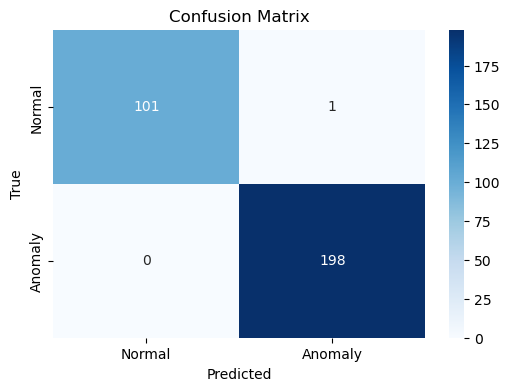

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

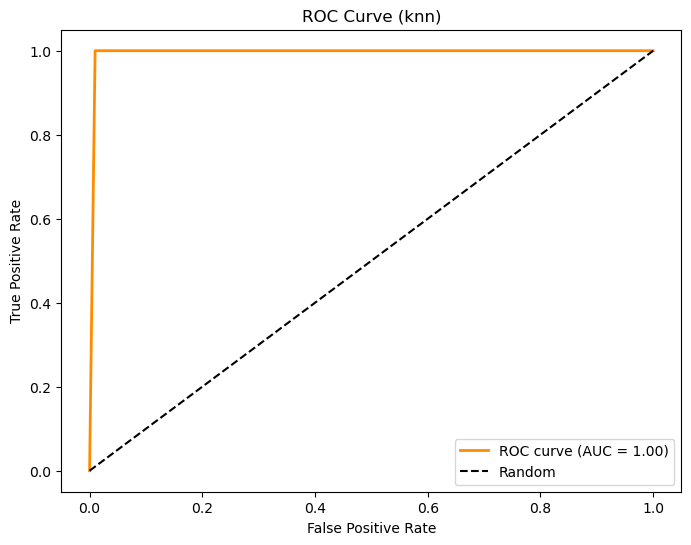

In [34]:
from sklearn.metrics import roc_curve, auc

# Tính đường cong ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)

# Tính diện tích dưới đường cong ROC (AUC)
auc_knn = auc(fpr_knn, tpr_knn)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_knn))
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (knn)')
# plt.legend(loc="lower right")
plt.legend()
plt.show()

In [35]:
#SVM
# Khởi tạo và huấn luyện mô hình SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [36]:
# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled)

In [37]:
# Tính toán và in kết quả
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, zero_division=1)

print("Accuracy (SVM):", accuracy_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)
print("Classification Report (SVM):\n", classification_rep_svm)

Accuracy (SVM): 1.0
Confusion Matrix (SVM):
 [[102   0]
 [  0 198]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       198

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



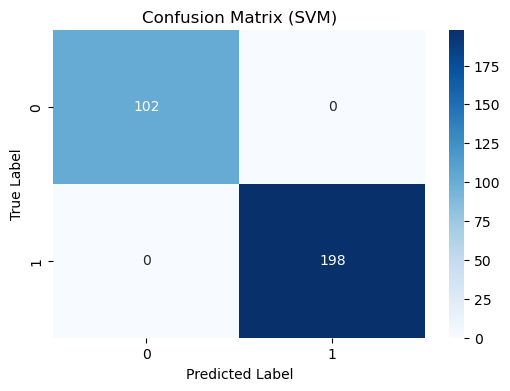

In [38]:
# Vẽ sơ đồ ma trận
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AUC (SVM): 1.0


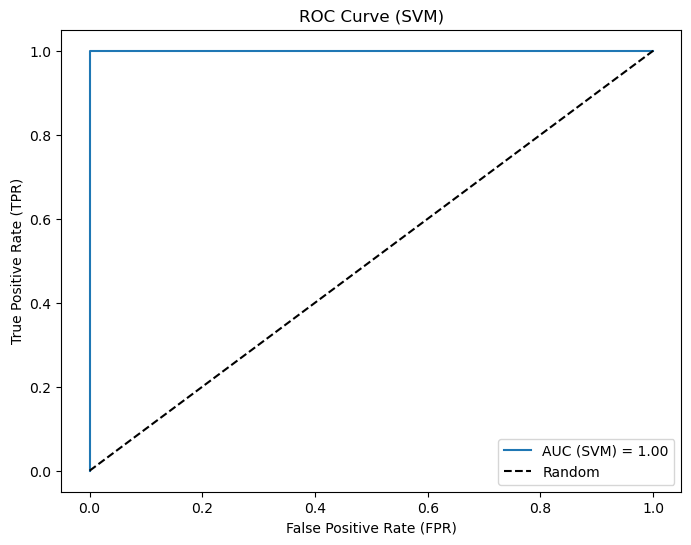

Accuracy (SVM): 1.0
Confusion Matrix (SVM):
 [[102   0]
 [  0 198]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       198

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [39]:
# Tính AUC
auc_svm = roc_auc_score(y_test, y_pred_svm)
print("AUC (SVM):", auc_svm)

# Vẽ đường cong ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (SVM)')
plt.legend()
plt.show()

# In kết quả
print("Accuracy (SVM):", accuracy_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)
print("Classification Report (SVM):\n", classification_rep_svm)

In [40]:
#MLP
# Xây dựng và huấn luyện mô hình MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [41]:
# Dự đoán cho tập kiểm tra
y_pred_mlp = mlp_model.predict(X_test_scaled)

Accuracy on test data: 1.0


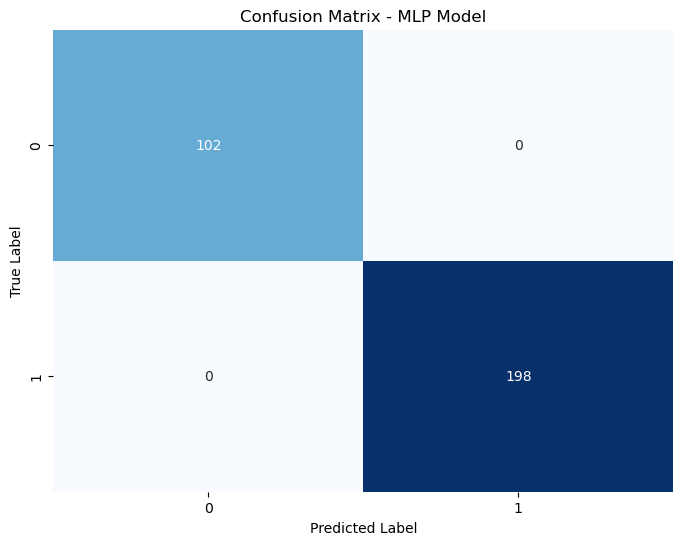

In [42]:
# Đánh giá hiệu suất
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy on test data: {accuracy_mlp}')

# Tạo confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

# Vẽ sơ đồ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=mlp_model.classes_,
            yticklabels=mlp_model.classes_)
plt.title('Confusion Matrix - MLP Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AUC (lstm_2): 1.0


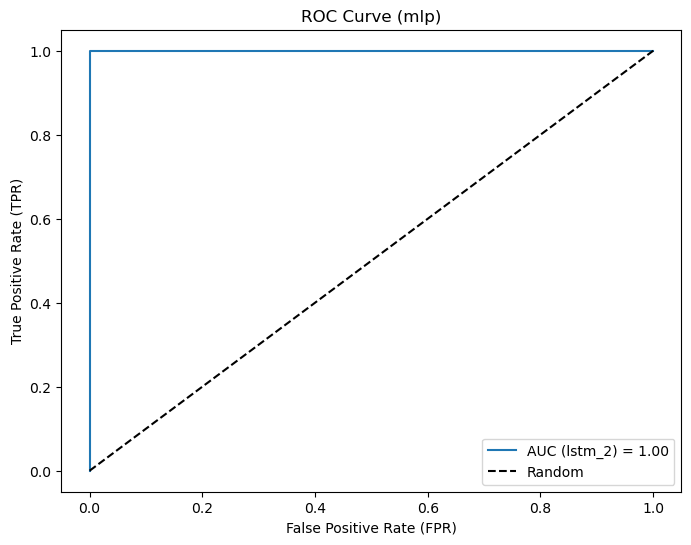

In [43]:
# Tính AUC
y_test = y_test.astype(float)
y_pred_mlp = y_pred_mlp.astype(float)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)
print("AUC (lstm_2):", auc_mlp)

# Vẽ đường cong ROC
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f'AUC (lstm_2) = {auc_mlp:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (mlp)')
plt.legend()
plt.show()

In [44]:
#Fuzzy_LSTM
# Reshape dữ liệu cho đầu vào LSTM (giả sử bạn đang sử dụng chuỗi thời gian đơn biến)
X_train_scaled_fuzzy_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled_fuzzy_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled_fuzzy_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [45]:
# Huấn luyện mô hình
model.fit(X_train_scaled_fuzzy_lstm, y_train, epochs=80, batch_size=32, validation_data=(X_test_scaled_fuzzy_lstm, y_test))

Epoch 1/80

22/22 [==============================] - 4s 43ms/step - loss: 0.4407 - val_loss: 0.3084
Epoch 2/80
22/22 [==============================] - 0s 8ms/step - loss: 0.1820 - val_loss: 0.0863
Epoch 3/80
22/22 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0164
Epoch 4/80
22/22 [==============================] - 0s 5ms/step - loss: 0.0142 - val_loss: 0.0091
Epoch 5/80
22/22 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0045
Epoch 6/80
22/22 [==============================] - 0s 8ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 7/80
22/22 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 8/80
22/22 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 9/80
22/22 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 10/80
22/22 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 11/80
22/22

Epoch 77/80
22/22 [==============================] - 0s 6ms/step - loss: 6.9929e-06 - val_loss: 1.2454e-05
Epoch 78/80
22/22 [==============================] - 0s 10ms/step - loss: 7.0060e-06 - val_loss: 3.6353e-05
Epoch 79/80
22/22 [==============================] - 0s 6ms/step - loss: 8.3247e-06 - val_loss: 1.1815e-05
Epoch 80/80
22/22 [==============================] - 0s 7ms/step - loss: 9.9179e-06 - val_loss: 4.6001e-05


In [46]:
# Dự đoán
y_pred_fuzzy_lstm = model.predict(X_test_scaled_fuzzy_lstm)

10/10 [==============================] - 0s 3ms/step


In [47]:
# Xác định hàm 
def define_membership_functions(x):
    x_low = fuzz.trimf(x, [0, 0, 0.5])
    x_medium = fuzz.trimf(x, [0, 0.5, 1])
    x_high = fuzz.trimf(x, [0.5, 1, 1])
    return x_low, x_medium, x_high

In [48]:
# Áp dụng cá thành phần của hàm
fuzzy_values = define_membership_functions(y_test)

In [49]:
def fuzzy_rules(low, medium, high):
   # Xác định luật mờ dựa trên giá trị thành viên
 # Thêm các quy tắc mờ 
    result = np.full_like(low, "No Attack", dtype='str')

    # Apply fuzzy rules
    result[high > 0.5] = "High"
    result[(medium > 0.5) & (result == "No Attack")] = "Medium"
    result[(low > 0.5) & (result == "No Attack")] = "Low"

    return result


In [50]:
# Áp dụng quy tắc mờ cho giá trị mờ
result = fuzzy_rules(fuzzy_values[0], fuzzy_values[1], fuzzy_values[2])

In [51]:
print("Fuzzy Result:", result)

Fuzzy Result: ['H' 'H' 'H' 'N' 'H' 'N' 'H' 'N' 'H' 'N' 'N' 'N' 'N' 'N' 'N' 'H' 'H' 'H'
 'H' 'H' 'N' 'H' 'N' 'N' 'N' 'H' 'H' 'H' 'H' 'H' 'N' 'H' 'N' 'H' 'N' 'H'
 'H' 'H' 'N' 'N' 'H' 'H' 'N' 'H' 'H' 'H' 'H' 'N' 'H' 'N' 'N' 'H' 'H' 'H'
 'H' 'H' 'H' 'N' 'H' 'H' 'H' 'N' 'N' 'N' 'N' 'H' 'H' 'N' 'H' 'N' 'H' 'N'
 'N' 'H' 'N' 'N' 'H' 'N' 'N' 'N' 'H' 'H' 'H' 'N' 'H' 'H' 'N' 'N' 'H' 'H'
 'H' 'H' 'H' 'N' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'N' 'N' 'N' 'H' 'N'
 'N' 'N' 'N' 'H' 'H' 'H' 'H' 'H' 'N' 'H' 'N' 'H' 'H' 'H' 'H' 'N' 'H' 'N'
 'H' 'H' 'H' 'H' 'H' 'H' 'N' 'H' 'H' 'N' 'H' 'H' 'H' 'H' 'N' 'H' 'H' 'H'
 'H' 'N' 'H' 'H' 'H' 'N' 'H' 'N' 'H' 'H' 'H' 'H' 'N' 'H' 'H' 'H' 'H' 'H'
 'N' 'N' 'H' 'N' 'H' 'H' 'H' 'N' 'H' 'N' 'N' 'N' 'H' 'H' 'N' 'H' 'N' 'H'
 'H' 'H' 'H' 'H' 'H' 'N' 'H' 'N' 'N' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'N' 'H' 'H' 'N' 'H' 'N' 'H' 'H' 'H' 'H' 'H' 'H' 'N' 'N' 'H' 'H'
 'N' 'H' 'H' 'H' 'N' 'H' 'H' 'H' 'N' 'N' 'N' 'N' 'H' 'H' 'H' 'N' 'H' 'N'
 'H' 'H' 'H' 'H' 'H' 'N' 'H' 'N' 'H' 

In [52]:
result_binary = np.where(result == 'H', 1, 0)

In [53]:
# độ chính xác
accuracy_fuzzy_lstm_1 = np.sum(result_binary == y_test) / len(y_test)

# in
print("Accuracy:", accuracy_fuzzy_lstm_1)

Accuracy: 1.0


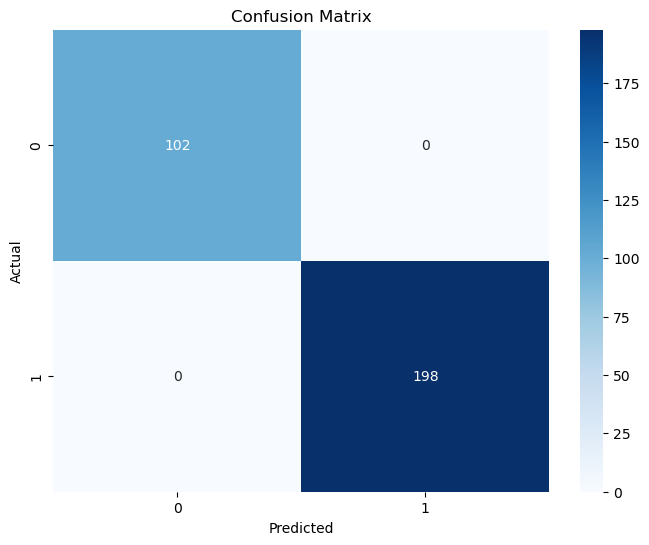

In [54]:
# y_test là nhãn thực và result_binary là nhãn được dự đoán
cm = confusion_matrix(y_test, result_binary)

# Tạo ma trận matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC (lstm_fuzzy): 1.0


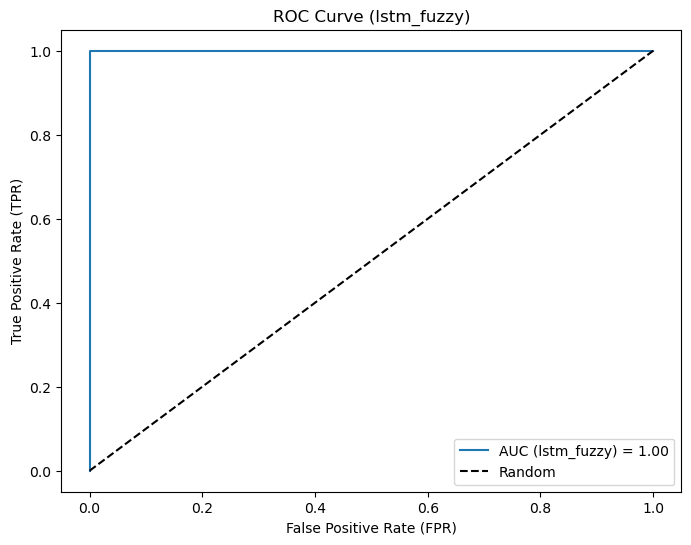

In [55]:
# Tính AUC
auc_lstm_fuzzy = roc_auc_score(y_test, result_binary)
print("AUC (lstm_fuzzy):", auc_lstm_fuzzy)

# Vẽ đường cong ROC
fpr_lstm_fuzzy, tpr_lstm_fuzzy, thresholds_lstm_fuzzy = roc_curve(y_test, result_binary)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm_fuzzy, tpr_lstm_fuzzy, label=f'AUC (lstm_fuzzy) = {auc_lstm_fuzzy:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (lstm_fuzzy)')
plt.legend()
plt.show()

In [56]:
def mitigate_ddos(X_test_scaled_fuzzy_lstm, result_binary, df):
    # Lấy chỉ số của các trường hợp dự đoán là DDoS
    ddos_indices = np.where(result_binary == 1)[0]
    
    # Lấy địa chỉ IP nguồn và cổng đích tương ứng từ DataFrame gốc df
    ddos_ips = df.iloc[ddos_indices][' Source IP']
    ddos_ports = df.iloc[ddos_indices][' Destination Port']
    
    for ip, port in zip(ddos_ips, ddos_ports):
        # Thực hiện các biện pháp giảm thiểu tấn công DDoS
        print(f"Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: {ip} trên cổng: {port}")

In [57]:
# 3. Cập nhật danh sách an toàn (Safe List)
def update_safe_list(safe_ips):
    # Thực hiện cập nhật danh sách an toàn để loại trừ các địa chỉ IP đáng tin cậy
    for ip in safe_ips:
        # Cập nhật danh sách an toàn, ví dụ: thêm IP vào danh sách an toàn
        print(f"Thêm IP: {ip} vào danh sách an toàn")

In [58]:
def mitigate_attacks(X_test_scaled_fuzzy_lstm, result_binary):
    # Giảm thiểu tấn công DDoS
    mitigate_ddos(X_test_scaled_fuzzy_lstm, result_binary,df)
    
    # Cập nhật danh sách an toàn (Safe List)
    safe_ips = ['192.168.1.1', '10.0.0.1']  # Ví dụ danh sách các địa chỉ IP đáng tin cậy
    update_safe_list(safe_ips)

In [59]:
# Gọi hàm để thực hiện giảm thiểu các tấn công
mitigate_attacks(X_test_scaled_fuzzy_lstm, result_binary)



Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 60495
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 192.168.50.1 trên cổng: 60495
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 46391
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 27878
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 22713
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 56681
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 60508
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 63045
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 0
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 44802
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 3192
Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: 172.16.0.5 trên cổng: 15612
Chặn lưu lượng tấn công DDOS từ

In [60]:
#lstm_2
def lstm_2_model(input_shape):
    model = Sequential()
    # Thêm lớp LSTM với 64 đơn vị
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    # Thêm lớp LSTM với 32 đơn vị
    model.add(LSTM(32))
    
    model.add(Dense(1, activation='sigmoid'))
    return model

In [61]:
# Reshape dữ liệu cho đầu vào LSTM (giả sử bạn đang sử dụng chuỗi thời gian đơn biến)
X_train_scaled_lstm_2 = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled_lstm_2 = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
input_shape = (X_train_scaled_lstm_2.shape[1], 1)
model = lstm_2_model(input_shape)

In [62]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled_lstm_2, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled_lstm_2, y_test))

Epoch 1/10

22/22 [==============================] - 11s 121ms/step - loss: 0.6539 - accuracy: 0.6103 - val_loss: 0.5708 - val_accuracy: 0.6633
Epoch 2/10
22/22 [==============================] - 1s 36ms/step - loss: 0.4464 - accuracy: 0.7794 - val_loss: 0.2603 - val_accuracy: 0.8767
Epoch 3/10
22/22 [==============================] - 1s 36ms/step - loss: 0.1902 - accuracy: 0.9298 - val_loss: 0.1633 - val_accuracy: 0.9467
Epoch 4/10
22/22 [==============================] - 1s 42ms/step - loss: 0.1092 - accuracy: 0.9585 - val_loss: 0.1132 - val_accuracy: 0.9700
Epoch 5/10
22/22 [==============================] - 1s 38ms/step - loss: 0.0608 - accuracy: 0.9857 - val_loss: 0.0620 - val_accuracy: 0.9767
Epoch 6/10
22/22 [==============================] - 1s 36ms/step - loss: 0.0391 - accuracy: 0.9928 - val_loss: 0.0358 - val_accuracy: 0.9967
Epoch 7/10
22/22 [==============================] - 1s 35ms/step - loss: 0.0418 - accuracy: 0.9914 - val_loss: 0.0605 - val_accuracy: 0.9767
Epoch 8/10

10/10 [==============================] - 2s 14ms/step
Accuracy: 1.0
Confusion Matrix:
[[102   0]
 [  0 198]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       102
         1.0       1.00      1.00      1.00       198

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



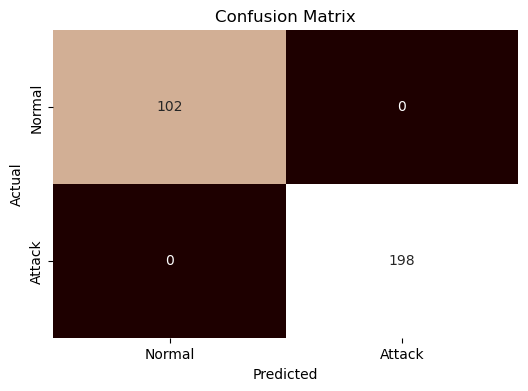

In [63]:
y_pred_proba = model.predict(X_test_scaled_lstm_2)

# Áp đặt ngưỡng (ví dụ: 0.5) để chuyển đổi xác suất thành nhãn dự đoán
threshold = 0.5
y_pred_lstm_2 = (y_pred_proba > threshold).astype(int)

# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred_lstm_2)
# Giả sử y_true là giá trị thực tế, và y_pred là giá trị dự đoán
accuracy_lstm2 = accuracy_score(y_test, y_pred_lstm_2)
print("Accuracy:", accuracy_lstm2)

# In ma trận nhầm lẫn
print("Confusion Matrix:")
print(conf_matrix)

# Tính toán và in báo cáo phân loại
classification_rep = classification_report(y_test, y_pred_lstm_2)
print("\nClassification Report:")
print(classification_rep)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', cbar=False,
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC (lstm_2): 1.0


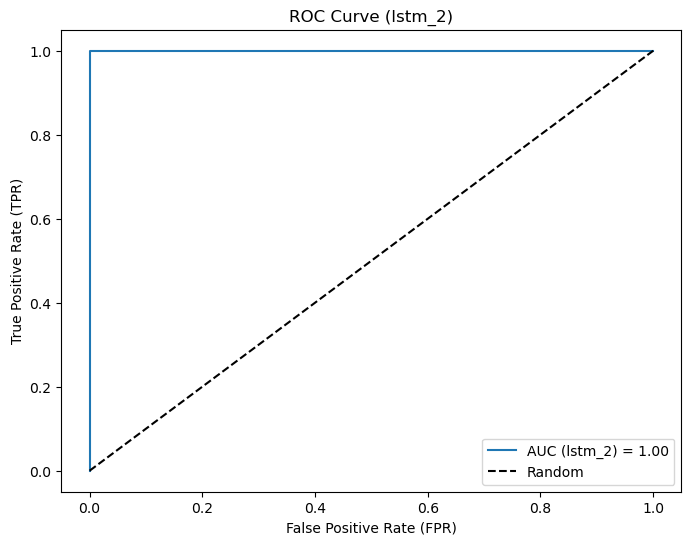

In [64]:
# Tính AUC
auc_lstm_2 = roc_auc_score(y_test, y_pred_lstm_2)
print("AUC (lstm_2):", auc_lstm_2)

# Vẽ đường cong ROC
fpr_lstm_2, tpr_lstm_2, thresholds_lstm_2 = roc_curve(y_test, y_pred_lstm_2)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm_2, tpr_lstm_2, label=f'AUC (lstm_2) = {auc_lstm_2:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (lstm_2)')
plt.legend()
plt.show()

AUC Results:
       Method       AUC
0  lstm_fuzzy  1.000000
1         knn  0.995098
2         mlp  1.000000
3      lstm_2  1.000000
4         SVM  1.000000


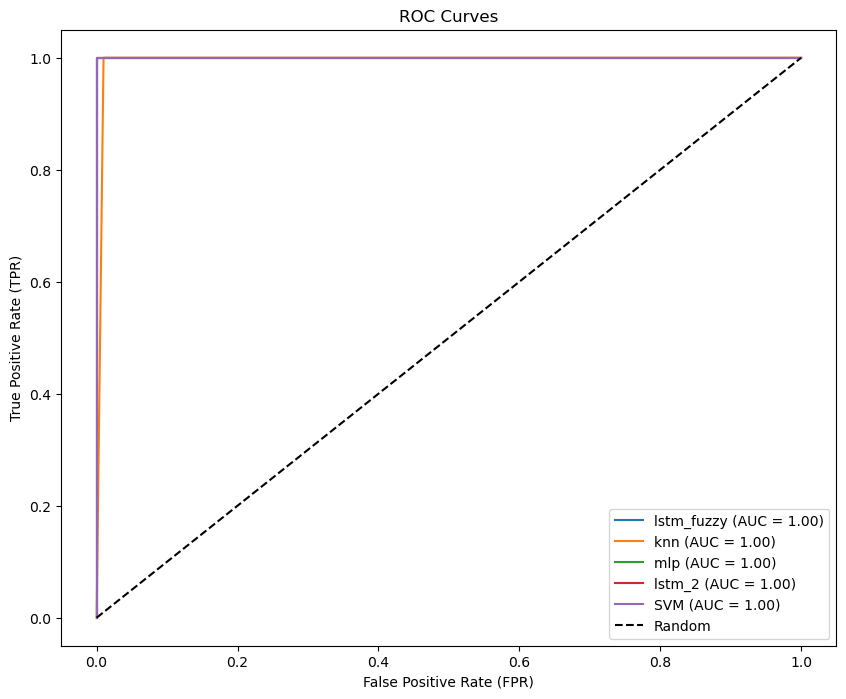

In [65]:
import pandas as pd

# Tạo DataFrame chứa kết quả AUC
data = {
    'Method': ['lstm_fuzzy', 'knn', 'mlp', 'lstm_2', 'SVM'],
    'AUC': [auc_lstm_fuzzy, auc_knn, auc_mlp, auc_lstm_2, auc_svm]
}

df_auc = pd.DataFrame(data)

# In bảng kết quả AUC
print("AUC Results:")
print(df_auc)

# Vẽ đường cong ROC trên cùng một đồ thị
plt.figure(figsize=(10, 8))

# Đường cong ROC cho lstm_fuzzy
plt.plot(fpr_lstm_fuzzy, tpr_lstm_fuzzy, label=f'lstm_fuzzy (AUC = {auc_lstm_fuzzy:.2f})')

# Đường cong ROC cho knn
plt.plot(fpr_knn, tpr_knn, label=f'knn (AUC = {auc_knn:.2f})')

# Đường cong ROC cho mlp
plt.plot(fpr_mlp, tpr_mlp, label=f'mlp (AUC = {auc_mlp:.2f})')

# Đường cong ROC cho lstm_2
plt.plot(fpr_lstm_2, tpr_lstm_2, label=f'lstm_2 (AUC = {auc_lstm_2:.2f})')

# Đường cong ROC cho SVM
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

# Đường đường chéo thể hiện dự đoán ngẫu nhiên
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves')
plt.legend()
plt.show()

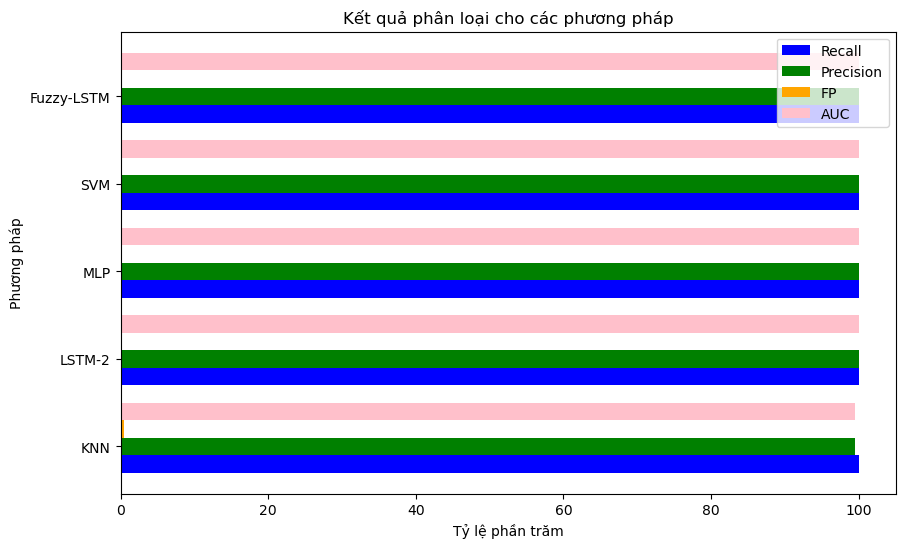

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Lấy kết quả từ classification_report
classification_rep_svm = classification_report(y_test, y_pred_svm, zero_division=1)
classification_rep_mlp = classification_report(y_test, y_pred_mlp, zero_division=1)
classification_rep_knn = classification_report(y_test, y_pred_knn)
classification_rep_fuzzy_lstm = classification_report(y_test, result_binary)
classification_rep_lstm_2 = classification_report(y_test, y_pred_lstm_2)
# Lấy giá trị Precision, Recall và F1-score
precision_svm, recall_svm, f1_score_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='binary')
precision_mlp, recall_mlp, f1_score_mlp, _ = precision_recall_fscore_support(y_test, y_pred_mlp, average='binary')
precision_knn, recall_knn, f1_score_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='binary')
precision_fuzzy_lstm, recall_fuzzy_lstm, f1_score_fuzzy_lstm, _ = precision_recall_fscore_support(y_test, result_binary, average='binary')
precision_fuzzy_lstm_2, recall_fuzzy_lstm_2, f1_score_fuzzy_lstm_2, _ = precision_recall_fscore_support(y_test, y_pred_lstm_2, average='binary')

#auc
auc_lstm_2 = roc_auc_score(y_test, y_pred_lstm_2)
auc_svm = roc_auc_score(y_test, y_pred_svm)
auc_lstm_fuzzy = roc_auc_score(y_test, result_binary)
auc_knn = roc_auc_score(y_test, y_pred_knn)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)
# Dữ liệu
methods = ['KNN', 'LSTM-2', 'MLP','SVM','Fuzzy-LSTM']
recall_values = [recall_knn*100, recall_fuzzy_lstm_2*100,recall_mlp*100,recall_svm*100,recall_fuzzy_lstm*100]
precision_values = [precision_knn*100, precision_fuzzy_lstm_2*100, precision_mlp*100,precision_svm*100,precision_fuzzy_lstm*100]
FP_values = [(1-precision_knn)*100, (1-precision_fuzzy_lstm_2)*100, (1-precision_mlp)*100,(1-precision_svm)*100,(1-precision_fuzzy_lstm)*100]
auc_values = [auc_knn*100,auc_lstm_2*100,auc_mlp*100,auc_svm*100,auc_lstm_fuzzy*100]

# Vẽ biểu đồ cột nằm ngang
bar_height = 0.2
index = np.arange(len(methods))

plt.figure(figsize=(10, 6))

plt.barh(index, recall_values, bar_height, label='Recall', color='blue')
plt.barh(index + bar_height, precision_values, bar_height, label='Precision', color='green')
plt.barh(index + 2 * bar_height, FP_values, bar_height, label='FP', color='orange')
plt.barh(index + 3 * bar_height, auc_values, bar_height, label='AUC', color='pink')

plt.ylabel('Phương pháp')
plt.xlabel('Tỷ lệ phần trăm')
plt.title('Kết quả phân loại cho các phương pháp')
plt.yticks(index + bar_height, methods)
plt.legend()

plt.show()



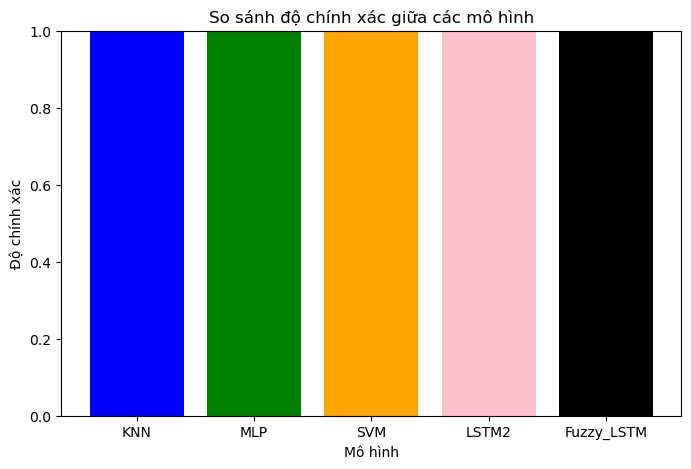

In [67]:
# Độ chính xác từ các mô hình (thay thế bằng giá trị thực tế của bạn)
accuracies = [accuracy_knn, accuracy_mlp, accuracy_svm,accuracy_lstm2,accuracy_fuzzy_lstm_1]
models = ['KNN', 'MLP', 'SVM','LSTM2','Fuzzy_LSTM']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange','pink','black'])
plt.title('So sánh độ chính xác giữa các mô hình')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.ylim(0, 1)  # Đảm bảo trục y từ 0 đến 1
plt.show()

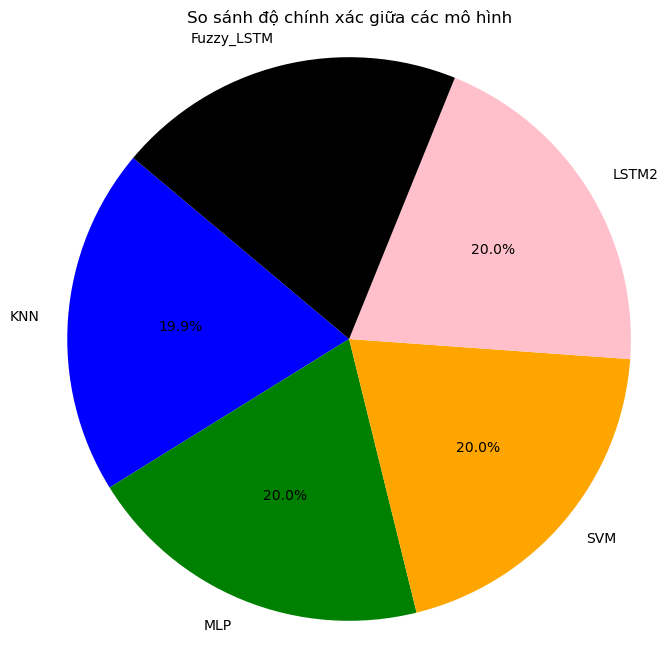

In [68]:
# Độ chính xác từ các mô hình (thay thế bằng giá trị thực tế của bạn)
accuracies = [accuracy_knn, accuracy_mlp, accuracy_svm,accuracy_lstm2,accuracy_fuzzy_lstm_1]
models = ['KNN', 'MLP', 'SVM', 'LSTM2', 'Fuzzy_LSTM']

# Vẽ biểu đồ bánh xe
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'orange', 'pink', 'black'])
plt.title('So sánh độ chính xác giữa các mô hình')
plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.show()

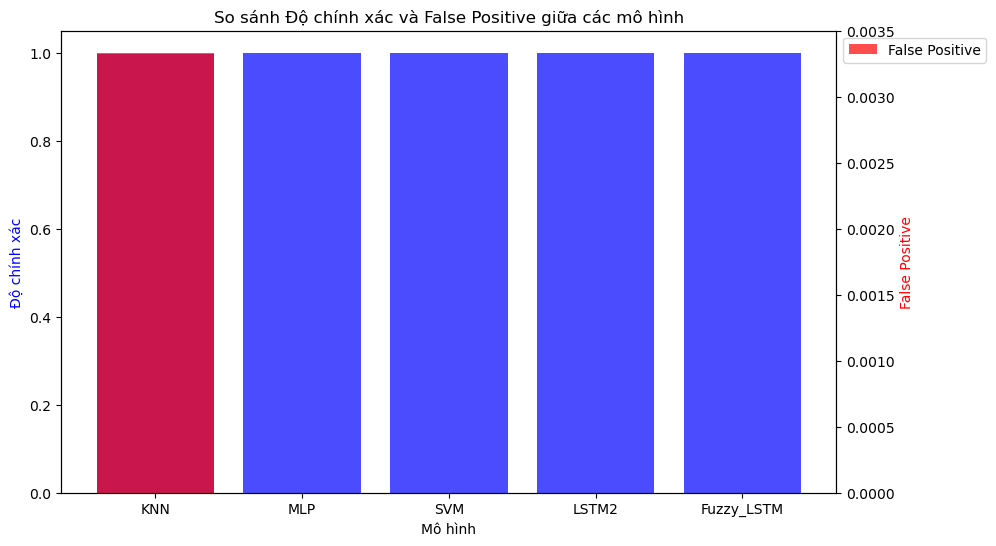

In [69]:
# Độ chính xác và số lượng False Positive từ các mô hình (thay thế bằng giá trị thực tế của bạn)
accuracies = [accuracy_knn, accuracy_mlp, accuracy_svm,accuracy_lstm2,accuracy_fuzzy_lstm_1]
fps = [1 - acc for acc in accuracies]  # Tính False Positive

models = ['KNN', 'MLP', 'SVM', 'LSTM2', 'Fuzzy_LSTM']

# Vẽ biểu đồ cột
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ cột cho độ chính xác
ax1.bar(models, accuracies, color='blue', alpha=0.7, label='Accuracy')

# Biểu đồ cột cho False Positive
ax2 = ax1.twinx()
ax2.bar(models, fps, color='red', alpha=0.7, label='False Positive')

# Đặt các nhãn và tiêu đề
ax1.set_xlabel('Mô hình')
ax1.set_ylabel('Độ chính xác', color='blue')
ax2.set_ylabel('False Positive', color='red')

# Hiển thị chú thích
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('So sánh Độ chính xác và False Positive giữa các mô hình')
plt.show()

In [70]:
file_to_read_1 = "DrDoS_MSSQL.csv"

In [71]:
# Đường dẫn đầy đủ đến file
full_path = os.path.join(data_path, file_to_read_1)

In [72]:
# Đọc file CSV vào DataFrame
df1 = pd.read_csv(full_path, dtype={'Idle Min': 'str'}, nrows=100)

In [73]:
df1

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,139,172.16.0.5-192.168.50.1-0-0-0,172.16.0.5,0,192.168.50.1,0,0,2018-12-01 11:32:32.915441,119151083,60959,...,2.853681e+07,67834732.0,4024278.0,5975510.0,98.183502,5975622.0,5975358.0,0,1,DrDoS_MSSQL
1,38385,172.16.0.5-192.168.50.1-850-20345-17,172.16.0.5,850,192.168.50.1,20345,17,2018-12-01 11:32:32.915442,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
2,27033,172.16.0.5-192.168.50.1-851-21631-17,172.16.0.5,851,192.168.50.1,21631,17,2018-12-01 11:32:32.915578,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
3,34348,172.16.0.5-192.168.50.1-852-15332-17,172.16.0.5,852,192.168.50.1,15332,17,2018-12-01 11:32:32.915773,2,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
4,19225,172.16.0.5-192.168.50.1-853-41853-17,172.16.0.5,853,192.168.50.1,41853,17,2018-12-01 11:32:32.916114,2,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50617,172.16.0.5-192.168.50.1-926-33050-17,172.16.0.5,926,192.168.50.1,33050,17,2018-12-01 11:32:32.938731,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
96,24270,172.16.0.5-192.168.50.1-927-10106-17,172.16.0.5,927,192.168.50.1,10106,17,2018-12-01 11:32:32.939045,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
97,20123,172.16.0.5-192.168.50.1-928-52589-17,172.16.0.5,928,192.168.50.1,52589,17,2018-12-01 11:32:32.939373,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL
98,11820,172.16.0.5-192.168.50.1-929-61783-17,172.16.0.5,929,192.168.50.1,61783,17,2018-12-01 11:32:32.939377,1,2,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL


In [74]:
df1['label_so'] = 0

In [75]:
# Đặt giá trị 1 cho các dòng có giá trị 'DrDoS_DNS' trong cột 'column_name'
df1.loc[df1[' Label'] == 'DrDoS_MSSQL', 'label_so'] = 1
df1

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label,label_so
0,139,172.16.0.5-192.168.50.1-0-0-0,172.16.0.5,0,192.168.50.1,0,0,2018-12-01 11:32:32.915441,119151083,60959,...,67834732.0,4024278.0,5975510.0,98.183502,5975622.0,5975358.0,0,1,DrDoS_MSSQL,1
1,38385,172.16.0.5-192.168.50.1-850-20345-17,172.16.0.5,850,192.168.50.1,20345,17,2018-12-01 11:32:32.915442,1,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL,1
2,27033,172.16.0.5-192.168.50.1-851-21631-17,172.16.0.5,851,192.168.50.1,21631,17,2018-12-01 11:32:32.915578,1,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL,1
3,34348,172.16.0.5-192.168.50.1-852-15332-17,172.16.0.5,852,192.168.50.1,15332,17,2018-12-01 11:32:32.915773,2,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL,1
4,19225,172.16.0.5-192.168.50.1-853-41853-17,172.16.0.5,853,192.168.50.1,41853,17,2018-12-01 11:32:32.916114,2,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50617,172.16.0.5-192.168.50.1-926-33050-17,172.16.0.5,926,192.168.50.1,33050,17,2018-12-01 11:32:32.938731,1,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL,1
96,24270,172.16.0.5-192.168.50.1-927-10106-17,172.16.0.5,927,192.168.50.1,10106,17,2018-12-01 11:32:32.939045,1,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL,1
97,20123,172.16.0.5-192.168.50.1-928-52589-17,172.16.0.5,928,192.168.50.1,52589,17,2018-12-01 11:32:32.939373,1,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL,1
98,11820,172.16.0.5-192.168.50.1-929-61783-17,172.16.0.5,929,192.168.50.1,61783,17,2018-12-01 11:32:32.939377,1,2,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_MSSQL,1


In [76]:
df1 = df1.dropna()

In [77]:
selected_features =  ['Flow Bytes/s', ' Flow Packets/s',
                    ' Source IP', ' Destination IP',               
                    ' Source Port', ' Destination Port','label_so',' Label']
df1 = df1[selected_features]

In [78]:
# Đặt giá trị 1 cho các dòng có giá trị 'DrDoS_DNS' trong cột 'column_name'
df1.loc[df1[' Label'] == 'DrDoS_MSSQL', 'label_so'] = 1
df1

,Flow Bytes/s,Flow Packets/s,Source IP,Destination IP,Source Port,Destination Port,label_so,Label
0,0.000000e+00,5.154884e+02,172.16.0.5,192.168.50.1,0,0,1,DrDoS_MSSQL
1,2.944000e+09,2.000000e+06,172.16.0.5,192.168.50.1,850,20345,1,DrDoS_MSSQL
2,2.944000e+09,2.000000e+06,172.16.0.5,192.168.50.1,851,21631,1,DrDoS_MSSQL
3,1.472000e+09,1.000000e+06,172.16.0.5,192.168.50.1,852,15332,1,DrDoS_MSSQL
4,1.424000e+09,1.000000e+06,172.16.0.5,192.168.50.1,853,41853,1,DrDoS_MSSQL
...,...,...,...,...,...,...,...,...
95,2.112000e+09,2.000000e+06,172.16.0.5,192.168.50.1,926,33050,1,DrDoS_MSSQL
96,2.944000e+09,2.000000e+06,172.16.0.5,192.168.50.1,927,10106,1,DrDoS_MSSQL
97,2.896000e+09,2.000000e+06,172.16.0.5,192.168.50.1,928,52589,1,DrDoS_MSSQL
98,2.896000e+09,2.000000e+06,172.16.0.5,192.168.50.1,929,61783,1,DrDoS_MSSQL


In [79]:
X_train_knn1, X_test_knn1, y_train_knn1, y_test_knn1 = train_test_split(df1[['Flow Bytes/s', ' Flow Packets/s',' Source IP', ' Destination IP',' Source Port', ' Destination Port']], df1['label_so'], test_size=0.2, random_state=42)

In [80]:
X_train_knn1 = X_train_knn1.apply(pd.to_numeric, errors='coerce')

X_train_knn1 = np.clip(X_train_knn1, -np.finfo(np.float64).max, np.finfo(np.float64).max)
# Xác định tên các cột không phải là số
non_numeric_columns = [' Source IP', ' Destination IP']

# Mã hóa one-hot cho các cột không phải là số trong tập huấn luyện
X_train_encoded = pd.get_dummies(X_train_knn1, columns=non_numeric_columns)

# Mã hóa one-hot cho các cột không phải là số trong tập kiểm thử
X_test_encoded = pd.get_dummies(X_test_knn1, columns=non_numeric_columns)

# Đảm bảo cả hai tập dữ liệu có cùng tên cột sau khi mã hóa one-hot
common_columns = list(set(X_train_encoded.columns) & set(X_test_encoded.columns))
X_train_encoded = X_train_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]


# Áp dụng StandardScaler cho dữ liệu đã mã hóa
scaler = StandardScaler()
X_train_scaled_knn1 = scaler.fit_transform(X_train_encoded)
X_test_scaled_knn1 = scaler.transform(X_test_encoded)

D:\anacoda\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\anacoda\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count


In [81]:
# Kiểm tra giá trị NaN trong dữ liệu
print(np.isnan(X_train_scaled_knn1).sum())

# Xử lý giá trị NaN bằng cách thay thế chúng bằng giá trị trung bình hoặc phương sai của cột tương ứng
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Có thể chọn 'median', 'most_frequent',...
X_train_scaled_knn1 = imputer.fit_transform(X_train_scaled_knn1)
X_test_scaled_knn1 = imputer.fit_transform(X_test_scaled_knn1)


160


D:\anacoda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: [1 3]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
D:\anacoda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: [1 3]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [82]:
# Xây dựng mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled_knn1, y_train_knn1)

KNeighborsClassifier()

In [83]:
# Dự đoán
y_pred_knn1 = knn_model.predict(X_test_scaled_knn1)

In [84]:
# Đánh giá mô hình
print("Confusion Matrix:")
print(confusion_matrix(y_test_knn1, y_pred_knn1))

print("\nClassification Report:")
print(classification_report(y_test_knn1, y_pred_knn1))

Confusion Matrix:
[[20]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



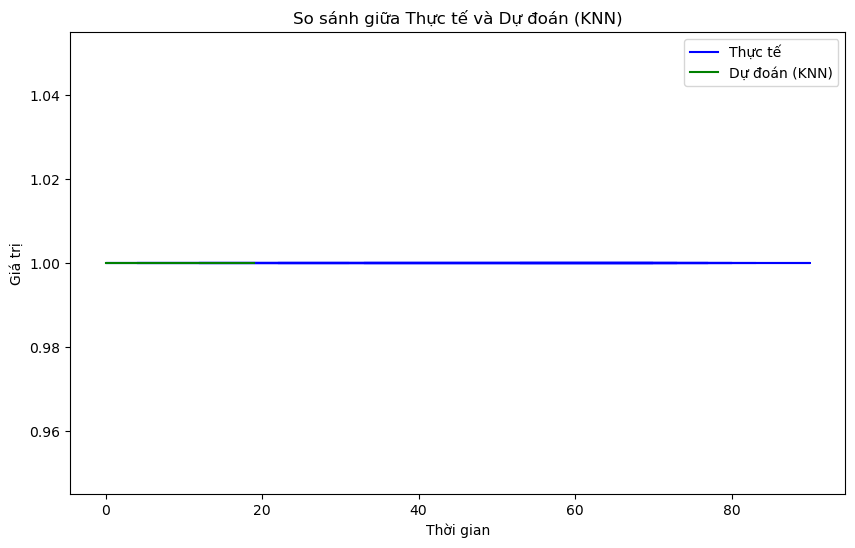

In [85]:
# Hiển thị đồ thị dự đoán của KNN
plt.figure(figsize=(10, 6))
plt.plot(y_test_knn1, label='Thực tế', color='blue')
plt.plot(y_pred_knn1, label='Dự đoán (KNN)', color='green')
plt.title('So sánh giữa Thực tế và Dự đoán (KNN)')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.legend()
plt.show()

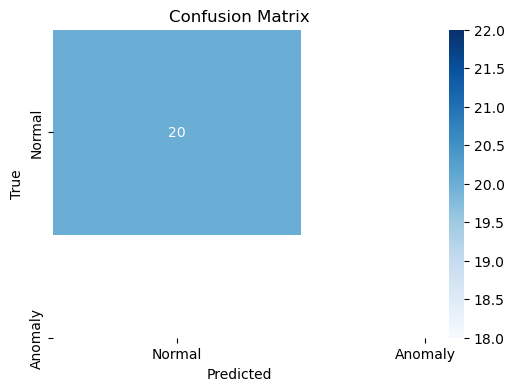

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test_knn1, y_pred_knn1)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


D:\anacoda\Lib\site-packages\sklearn\metrics\_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


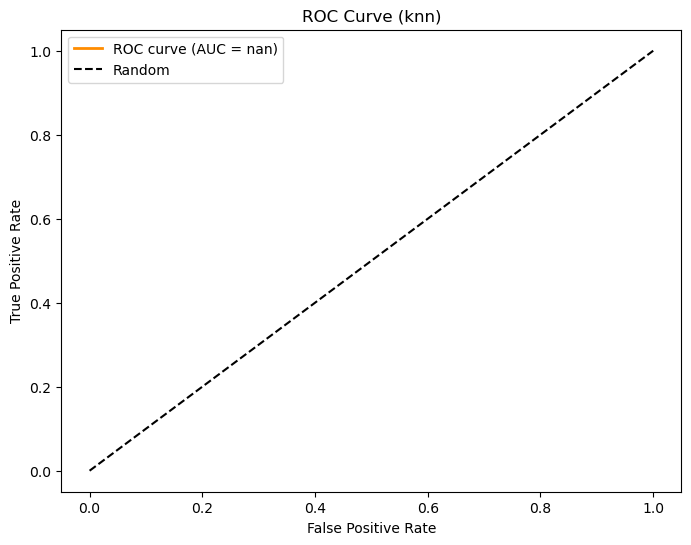

In [87]:
from sklearn.metrics import roc_curve, auc

# Tính đường cong ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_knn1, y_pred_knn1)

# Tính diện tích dưới đường cong ROC (AUC)
auc_knn = auc(fpr_knn, tpr_knn)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_knn))
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (knn)')
# plt.legend(loc="lower right")
plt.legend()
plt.show()

In [88]:
#svm
from sklearn.svm import SVC
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_svm1, X_test_svm1, y_train_svm1, y_test_svm1 = train_test_split(df1[['Flow Bytes/s', ' Flow Packets/s',' Source IP', ' Destination IP',' Source Port', ' Destination Port']], df1['label_so'], test_size=0.2, random_state=42)


In [89]:
X_train_svm1 = X_train_svm1.apply(pd.to_numeric, errors='coerce')

X_train_svm1 = np.clip(X_train_svm1, -np.finfo(np.float64).max, np.finfo(np.float64).max)
# Xác định tên các cột không phải là số
non_numeric_columns = [' Source IP', ' Destination IP']

# Mã hóa one-hot cho các cột không phải là số trong tập huấn luyện
X_train_encoded = pd.get_dummies(X_train_svm1, columns=non_numeric_columns)

# Mã hóa one-hot cho các cột không phải là số trong tập kiểm thử
X_test_encoded = pd.get_dummies(X_test_svm1, columns=non_numeric_columns)

# Đảm bảo cả hai tập dữ liệu có cùng tên cột sau khi mã hóa one-hot
common_columns = list(set(X_train_encoded.columns) & set(X_test_encoded.columns))
X_train_encoded = X_train_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]


# Áp dụng StandardScaler cho dữ liệu đã mã hóa
scaler = StandardScaler()
X_train_scaled_svm1 = scaler.fit_transform(X_train_encoded)
X_test_scaled_svm1 = scaler.transform(X_test_encoded)

D:\anacoda\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\anacoda\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count


In [90]:
# Kiểm tra giá trị NaN trong dữ liệu
print(np.isnan(X_train_scaled_svm1).sum())

# Xử lý giá trị NaN bằng cách thay thế chúng bằng giá trị trung bình hoặc phương sai của cột tương ứng
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Có thể chọn 'median', 'most_frequent',...
X_train_scaled_svm1 = imputer.fit_transform(X_train_scaled_svm1)
X_test_scaled_svm1 = imputer.fit_transform(X_test_scaled_svm1)

160


D:\anacoda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: [1 3]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
D:\anacoda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: [1 3]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [91]:
unique_classes = np.unique(y_train_svm1)
print("Unique classes in y_train_svm1:", unique_classes)

Unique classes in y_train_svm1: [1]
